# Condiciones de la asignación principal

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

### Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

## Plan de trabajo propuesto

### Cargar datos y bibliotecas

- Inspeccionar conjuntos de datos para preprocesamiento, EDA e ingeniería de características

### Procesar datos

- Llevar a cabo los planes indicados anteriormente con cada dataframe.
- Combinar los dataframes individuales en customerID para crear un dataframe con todos los datos.

### Análisis exploratorio

- Historgrama de tiempo antes de que canceleren los contratos.
- Gráfico de barras que muestra los contratos cancelados en contra a los vigentes y los tipos de contrato.
- Gráfico de barras que muestra los contratos cancelados en contra a los vigentes y los tipos de pago.
- Diagramas de caja y bigotes que muestran la distribución de:
    - Cargos mensuales de clientes que han cancelado contrato.
    - Cargos totales de clientes que han cancelado contrato.
    - Cargos mensuales de clientes vigentes.
    - Cargos totales de clientes vigentes.
- Gráfico de barras que muestra la información personal de los clientes han cancelado contrato en contra a los clientes vigentes a traves de los valores totales por:
    - Género
    - si estan jubilados
    - si estan en pareja
    - si son dependientes
- Gráfico de barras que muestra el tipo de contrato en relación con la información personal a traves de los valores totales por:
    - Género
    - si estan jubilados
    - si estan en pareja
    - si son dependientes
- Gráfico de barras para los clientes que cancelaron contrato y estan vigentes en relación con el tipo de servicio de Internet.
- Gráfico de barras para el tipo de contrato en relación con el tipo de servicio de Internet.
- Gráfico de barras que muestra los servicios de Internet y las multiples lineas telefonicas de los clientes que cancelaron contrato y estan vigentes a traves de los valores totales por:
    - Seguridad en línea
    - Copia de seguridad en línea
    - Protección de dispositivos
    - Soporte técnico
    - Transmisión de TV
    - Transmisión de películas
    - Multiples lineas telefonicas
- Gráfico de barras que muestra el tipo de contrato de los clientes con los servicios de Internet y multiples lineas telefonicas a traves de los valores totales por:
    - Seguridad en línea
    - Copia de seguridad en línea
    - Protección de dispositivos
    - Soporte técnico
    - Transmisión de TV
    - Transmisión de películas
    - Multiples lineas telefonicas

### Ingeniería de características.

- Crear nuevas columnas con el objetivo de:
    - Determinar meses restantes de los contratos.
    - Determianar el promedio de cargos por cliente y cargos adicionales.
    - Determinar precio por servicio
- Aplicar codificacion de datos.

### Entrenamiento de modelos.

- Se dividirán conjuntos de entrenamiento, validación y prueba en una proporción de 3:1:1.
- La división se estratificará en función de la rotación para garantizar una distribución uniforme entre los dos conjuntos.
- Las características serán casi todas las columnas, con la excepción de 'customer_id', 'begin_date', 'end_date','contract_duration_months'.
- El objetivo será la columna contract_cancelled.
- Entrenar y evaluar modelos de arbol de decisiones, bosque aletorio y regresion logistica.
- La puntuación utilizada será AUC-ROC con un objetivo de 0,90 o superior.
- Seleccionar el modelo con mejor rendimiento en función de AUC_ROC.

### Conclusión

- Se resumirán los hallazgos de la EDA.
- El modelo seleccionado será recomendado.

In [1]:
# Librerias estandar
import pandas
import numpy
import datetime as dt
import matplotlib.pyplot as plt

# Librerias de terceros

# Librerias especificas
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

import statsmodels.api as sm 


from sklearn.metrics import roc_auc_score


In [2]:
# Cargamos los datasets

df_contract = pandas.read_csv('/datasets/final_provider/contract.csv')
df_personal = pandas.read_csv('/datasets/final_provider/personal.csv')
df_internet = pandas.read_csv('/datasets/final_provider/internet.csv')
df_phone = pandas.read_csv('/datasets/final_provider/phone.csv')

# Carga de los datasets por archivos locales

#df_contract = pandas.read_csv('contract.csv')
#df_personal = pandas.read_csv('personal.csv')
#df_internet = pandas.read_csv('internet.csv')
#df_phone = pandas.read_csv('phone.csv')

## Análisis de clientes de Interconnect

Para ayudar a Intercom, un proveedor de telecomunicaciones e Internet, analizaremos los datos de los clientes para crear un modelo con aprendizaje automático que ayude a evaluar e identificar a los clientes que probablemente abandonen o finalicen sus contratos.

Realizaremos un análisis exploratorio de los datos con representaciones visuales de los mismos para intentar identificar patrones o tendencias. Luego, los datos se optimizarán y se utilizarán para entrenar modelos de aprendizaje automático, de los cuales se seleccionarán los mejores, para identificar a los clientes que probablemente abandonen el servicio.

Nuestra métrica de evaluación para esta tarea es ROC-AUC (AUC) de la característica del operador receptor (ROC). Cuanto más cerca de 1 esté el puntaje ROC-AUC, mejor será la capacidad del modelo para predecir con precisión.

## Descripcion General y procesamiento de datos.

Primero revisaremos los datos de cada DataFrame y posteriormente una descripcion de como procesaremos esos datos.

### Comenzamos por el DataFrame 'df_contract'

In [3]:
# Mostramos informacion y las primeras filas del DataFrame
display(df_contract.info())
display(df_contract.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
# Convertir los nombres de las columnas en minusculas con espacios en guion bajo.
df_contract = df_contract.rename(columns={'customerID' : 'customer_id', 'BeginDate' : 'begin_date', 'EndDate' : 'end_date', 'Type' : 'contract_type', 'PaperlessBilling' : 'paperless_billing', 'PaymentMethod' : 'payment_method', 'MonthlyCharges' : 'monthly_charges', 'TotalCharges' : 'total_charges'})

In [5]:
# Convertir "month-to-month" en la columna 'contract_type' a "monthly", con los objetivos de reducir la longitud del String y el segundo es que "monthly" es mas sencillo de entender.
df_contract['contract_type'] = df_contract['contract_type'].where(df_contract['contract_type'] != 'Month-to-month', 'Monthly')

In [6]:
# Convertir Fechas al tipo de datos 'datetime', esto requerirá convertir los valores "No" en 'enddate' a valores faltantes.
df_contract['begin_date'] = pandas.to_datetime(df_contract['begin_date'], format='%Y-%m-%d')

df_contract['end_date'] = df_contract['end_date'].where(df_contract['end_date'] != 'No',None)
df_contract['end_date'] = pandas.to_datetime(df_contract['end_date'], format='%Y-%m-%d %H:%M:%S')
df_contract['end_date'] = pandas.to_datetime(df_contract['end_date'], format='%Y-%m-%d')

In [7]:
# Creamos la columna 'contract_duration_months' con un valor entero que representa la cantidad de meses que un cliente permaneció antes de abandonar el servicio y valores faltantes para aquellos que no lo han hecho
duration = ((df_contract['end_date'] - df_contract['begin_date']) / numpy.timedelta64(1, 'D'))
duration = duration / 30.4375
df_contract['contract_duration_months'] = duration.round()


In [8]:
### Creamos la columna 'contract_cancelled' con 1 y 0 determinado por 'enddate'
df_contract['contract_cancelled'] = df_contract['contract_duration_months']
df_contract['contract_cancelled'] = df_contract['contract_cancelled'].fillna(0)
df_contract['contract_cancelled'] = df_contract['contract_cancelled'].where(df_contract['contract_cancelled'] < 0.5, 1)
df_contract['contract_cancelled'] = df_contract['contract_cancelled'].astype(int)

In [9]:
# Convertimos los valores 'Yes' y 'No' de 'paperless_billing' a 1 y 0
df_contract['paperless_billing'] = df_contract['paperless_billing'].where(df_contract['paperless_billing'] != 'Yes', 1)
df_contract['paperless_billing'] = df_contract['paperless_billing'].where(df_contract['paperless_billing'] != 'No', 0)
df_contract['paperless_billing'] = df_contract['paperless_billing'].astype(int)

In [10]:
# Convertir la columna 'total_charges' a float
df_contract['total_charges'] = pandas.to_numeric(df_contract['total_charges'], errors='coerce')

In [11]:
# Comprobamos que los cambios se hayan hecho en el DataFrame
df_contract.info()
df_contract.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               7043 non-null   object        
 1   begin_date                7043 non-null   datetime64[ns]
 2   end_date                  1869 non-null   datetime64[ns]
 3   contract_type             7043 non-null   object        
 4   paperless_billing         7043 non-null   int64         
 5   payment_method            7043 non-null   object        
 6   monthly_charges           7043 non-null   float64       
 7   total_charges             7032 non-null   float64       
 8   contract_duration_months  1869 non-null   float64       
 9   contract_cancelled        7043 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 550.4+ KB


,customer_id,begin_date,end_date,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,contract_duration_months,contract_cancelled
0,7590-VHVEG,2020-01-01,NaT,Monthly,1,Electronic check,29.85,29.85,NaN,0
1,5575-GNVDE,2017-04-01,NaT,One year,0,Mailed check,56.95,1889.50,NaN,0
2,3668-QPYBK,2019-10-01,2019-12-01,Monthly,1,Mailed check,53.85,108.15,2.0,1
3,7795-CFOCW,2016-05-01,NaT,One year,0,Bank transfer (automatic),42.30,1840.75,NaN,0
4,9237-HQITU,2019-09-01,2019-11-01,Monthly,1,Electronic check,70.70,151.65,2.0,1


In [12]:
# Comprobamos los datos duplicados del DataFrame
print('Comprobamos los datos duplicados en el dataset.')
print('El dataset tiene',df_contract.duplicated().sum(),'duplicados.')

Comprobamos los datos duplicados en el dataset.
El dataset tiene 0 duplicados.


### Dataframe 'df_personal'

In [13]:
# Mostramos informacion y las primeras filas del DataFrame
display(df_personal.info())
display(df_personal.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [14]:
# Convertir los nombres de las columnas en minusculas con espacios en guion bajo.
df_personal = df_personal.rename(columns={'customerID' : 'customer_id','gender' : 'gender' , 'SeniorCitizen' : 'senior_citizen', 'Partner' : 'partner', 'Dependents' : 'dependents'})

In [15]:
# Cambiar los valores 'Male' a 1 y los valores 'Female' a 0.
df_personal['gender'] = df_personal['gender'].where(df_personal['gender'] != 'Male', 1)
df_personal['gender'] = df_personal['gender'].where(df_personal['gender'] != 'Female', 0)
df_personal['gender'] = df_personal['gender'].astype(int)

In [16]:
# Convertir los valores de 'YES' y 'NO' a 1 y 0.
df_personal['partner'] = df_personal['partner'].where(df_personal['partner'] != 'Yes', 1)
df_personal['partner'] = df_personal['partner'].where(df_personal['partner'] != 'No', 0)

df_personal['dependents'] = df_personal['dependents'].where(df_personal['dependents'] != 'Yes', 1)
df_personal['dependents'] = df_personal['dependents'].where(df_personal['dependents'] != 'No', 0)

df_personal['partner'] = df_personal['partner'].astype(int)
df_personal['dependents'] = df_personal['dependents'].astype(int)

In [17]:
# Comprobamos que los cambios se hayan hecho en el DataFrame
display(df_personal.info())
display(df_personal.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   int64 
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   int64 
 4   dependents      7043 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 275.2+ KB


None

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,0,0,1,0
1,5575-GNVDE,1,0,0,0
2,3668-QPYBK,1,0,0,0
3,7795-CFOCW,1,0,0,0
4,9237-HQITU,0,0,0,0


In [18]:
# Comprobamos los datos duplicados del DataFrame
print('Comprobamos los datos duplicados en el dataset.')
print('El dataset tiene',df_personal.duplicated().sum(),'duplicados.')

Comprobamos los datos duplicados en el dataset.
El dataset tiene 0 duplicados.


### Dataframe 'df_internet'

In [19]:
# Mostramos informacion y las primeras filas del DataFrame
display(df_internet.info())
display(df_internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [20]:
# Convertir los nombres de las columnas en minusculas con espacios en guion bajo.
df_internet = df_internet.rename(columns={'customerID' : 'customer_id','InternetService' : 'internet_service' , 'OnlineSecurity' : 'online_security', 'OnlineBackup' : 'online_backup', 'DeviceProtection' : 'device_protection', 'TechSupport' : 'tech_support', 'StreamingTV' : 'streaming_tv', 'StreamingMovies' : 'streaming_movies'})

In [21]:
# Convertir los valores de 'YES' y 'NO' a 1 y 0.
df_internet = df_internet.where(df_internet != 'Yes', 1)
df_internet = df_internet.where(df_internet != 'No', 0)

# Corregimos los tipos de datos.
df_internet['online_security'] = df_internet['online_security'].astype(int)
df_internet['online_backup'] = df_internet['online_backup'].astype(int)
df_internet['device_protection'] = df_internet['device_protection'].astype(int)
df_internet['tech_support'] = df_internet['tech_support'].astype(int)
df_internet['streaming_tv'] = df_internet['streaming_tv'].astype(int)
df_internet['streaming_movies'] = df_internet['streaming_movies'].astype(int)

In [22]:
# Crearemos una columna llamada 'has_internet' con valor 1 y 0 para decir si el usuario tiene(1) o no internet(0)
has_internet = df_internet['internet_service']
df_internet['has_internet'] = has_internet
df_internet['has_internet'] = df_internet['has_internet'].where(df_internet['has_internet'] != 'DSL', 1)
df_internet['has_internet'] = df_internet['has_internet'].where(df_internet['has_internet'] != 'Fiber optic', 1)
df_internet['has_internet'] = df_internet['has_internet'].where(df_internet['has_internet'] != 'No service', 0)
df_internet['has_internet'] = df_internet['has_internet'].astype(int)

In [23]:
# Comprobamos que los cambios se hayan hecho en el DataFrame
display(df_internet.info())
display(df_internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   int64 
 3   online_backup      5517 non-null   int64 
 4   device_protection  5517 non-null   int64 
 5   tech_support       5517 non-null   int64 
 6   streaming_tv       5517 non-null   int64 
 7   streaming_movies   5517 non-null   int64 
 8   has_internet       5517 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 388.0+ KB


None

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,has_internet
0,7590-VHVEG,DSL,0,1,0,0,0,0,1
1,5575-GNVDE,DSL,1,0,1,0,0,0,1
2,3668-QPYBK,DSL,1,1,0,0,0,0,1
3,7795-CFOCW,DSL,1,0,1,1,0,0,1
4,9237-HQITU,Fiber optic,0,0,0,0,0,0,1


In [24]:
# Comprobamos los datos duplicados del DataFrame
print('Comprobamos los datos duplicados en el dataset.')
print('El dataset tiene',df_internet.duplicated().sum(),'duplicados.')

Comprobamos los datos duplicados en el dataset.
El dataset tiene 0 duplicados.


### Dataframe 'df_phone'

In [25]:
# Mostramos informacion y las primeras filas del DataFrame
display(df_phone.info())
display(df_phone.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [26]:
# Convertir los nombres de las columnas en minusculas con espacios en guion bajo.
df_phone = df_phone.rename(columns={'customerID' : 'customer_id','MultipleLines' : 'multiple_lines'})

In [27]:
# Convertir los valores de 'YES' y 'NO' a 1 y 0.
df_phone = df_phone.where(df_phone != 'Yes', 1)
df_phone = df_phone.where(df_phone != 'No', 0)

df_phone['multiple_lines'] = df_phone['multiple_lines'].astype(int)

In [28]:
# Crearemos una columna llamada 'phone_service' con valor 1 y 0 para decir si el usuario tiene(1) o no tiene(0)
phone_service = df_phone['multiple_lines']
df_phone['phone_service'] = phone_service
df_phone['phone_service'] = df_phone['phone_service'].where(df_phone['phone_service'] < 0, 1)

In [29]:
# Comprobamos que los cambios se hayan hecho en el DataFrame
display(df_phone.info())
display(df_phone.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   int64 
 2   phone_service   6361 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 149.2+ KB


None

,customer_id,multiple_lines,phone_service
0,5575-GNVDE,0,1
1,3668-QPYBK,0,1
2,9237-HQITU,0,1
3,9305-CDSKC,1,1
4,1452-KIOVK,1,1


In [30]:
# Comprobamos los datos duplicados del DataFrame
print('Comprobamos los datos duplicados en el dataset.')
print('El dataset tiene',df_phone.duplicated().sum(),'duplicados.')

Comprobamos los datos duplicados en el dataset.
El dataset tiene 0 duplicados.


## Creacion y procesamiento de DataFrame maestro.

- Combinamos los dataframe individuales en customerID para crear un DataFrame con todos los datos.

In [31]:
# Concatenamos todos los DataFrames
df_master = df_contract.merge(df_personal, on='customer_id', how='outer')
df_master = df_master.merge(df_internet, on='customer_id', how='outer')
df_master = df_master.merge(df_phone, on='customer_id', how='outer')

In [32]:
# Mostramos informacion y las primeras filas del DataFrame
df_master.info()
display(df_master.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               7043 non-null   object        
 1   begin_date                7043 non-null   datetime64[ns]
 2   end_date                  1869 non-null   datetime64[ns]
 3   contract_type             7043 non-null   object        
 4   paperless_billing         7043 non-null   int64         
 5   payment_method            7043 non-null   object        
 6   monthly_charges           7043 non-null   float64       
 7   total_charges             7032 non-null   float64       
 8   contract_duration_months  1869 non-null   float64       
 9   contract_cancelled        7043 non-null   int64         
 10  gender                    7043 non-null   int64         
 11  senior_citizen            7043 non-null   int64         
 12  partner             

,customer_id,begin_date,end_date,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,contract_duration_months,contract_cancelled,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,has_internet,multiple_lines,phone_service
0,7590-VHVEG,2020-01-01,NaT,Monthly,1,Electronic check,29.85,29.85,NaN,0,...,DSL,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,0,Mailed check,56.95,1889.50,NaN,0,...,DSL,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,3668-QPYBK,2019-10-01,2019-12-01,Monthly,1,Mailed check,53.85,108.15,2.0,1,...,DSL,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,7795-CFOCW,2016-05-01,NaT,One year,0,Bank transfer (automatic),42.30,1840.75,NaN,0,...,DSL,1.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Monthly,1,Electronic check,70.70,151.65,2.0,1,...,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [33]:
# Vemos las metricas basicas del DataFrame
display(df_master.describe())

,paperless_billing,monthly_charges,total_charges,contract_duration_months,contract_cancelled,gender,senior_citizen,partner,dependents,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,has_internet,multiple_lines,phone_service
count,7043.000000,7043.000000,7032.000000,1869.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.0,6361.000000,6361.0
mean,0.592219,64.761692,2283.300441,17.979133,0.265370,0.504756,0.162147,0.483033,0.299588,0.365960,0.440276,0.439007,0.370491,0.490665,0.495197,1.0,0.467065,1.0
std,0.491457,30.090047,2266.771362,19.531123,0.441561,0.500013,0.368612,0.499748,0.458110,0.481742,0.496465,0.496311,0.482980,0.499958,0.500022,0.0,0.498953,0.0
min,0.000000,18.250000,18.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.0
25%,0.000000,35.500000,401.450000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.0
50%,1.000000,70.350000,1397.475000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.0
75%,1.000000,89.850000,3794.737500,29.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0
max,1.000000,118.750000,8684.800000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0


In [34]:
# Comprobamos si hay datos nulos en el DataFrame
print('Comprobamos si hay datos nulos.')
print(df_master.isnull().sum())

Comprobamos si hay datos nulos.
customer_id                    0
begin_date                     0
end_date                    5174
contract_type                  0
paperless_billing              0
payment_method                 0
monthly_charges                0
total_charges                 11
contract_duration_months    5174
contract_cancelled             0
gender                         0
senior_citizen                 0
partner                        0
dependents                     0
internet_service            1526
online_security             1526
online_backup               1526
device_protection           1526
tech_support                1526
streaming_tv                1526
streaming_movies            1526
has_internet                1526
multiple_lines               682
phone_service                682
dtype: int64


In [35]:
# Mostramos los datos nulos de la columna 'total_charges'
display(df_master[df_master['total_charges'].isnull()])

,customer_id,begin_date,end_date,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,contract_duration_months,contract_cancelled,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,has_internet,multiple_lines,phone_service
488,4472-LVYGI,2020-02-01,NaT,Two year,1,Bank transfer (automatic),52.55,NaN,NaN,0,...,DSL,1.0,0.0,1.0,1.0,1.0,0.0,1.0,NaN,NaN
753,3115-CZMZD,2020-02-01,NaT,Two year,0,Mailed check,20.25,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
936,5709-LVOEQ,2020-02-01,NaT,Two year,0,Mailed check,80.85,NaN,NaN,0,...,DSL,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1082,4367-NUYAO,2020-02-01,NaT,Two year,0,Mailed check,25.75,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
1340,1371-DWPAZ,2020-02-01,NaT,Two year,0,Credit card (automatic),56.05,NaN,NaN,0,...,DSL,1.0,1.0,1.0,1.0,1.0,0.0,1.0,NaN,NaN
3331,7644-OMVMY,2020-02-01,NaT,Two year,0,Mailed check,19.85,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
3826,3213-VVOLG,2020-02-01,NaT,Two year,0,Mailed check,25.35,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
4380,2520-SGTTA,2020-02-01,NaT,Two year,0,Mailed check,20.00,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
5218,2923-ARZLG,2020-02-01,NaT,One year,1,Mailed check,19.70,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
6670,4075-WKNIU,2020-02-01,NaT,Two year,0,Mailed check,73.35,NaN,NaN,0,...,DSL,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [36]:
# Mostramos el dato maximo de la columna 'begin_date'
df_master['begin_date'].max()

Timestamp('2020-02-01 00:00:00')

Los clientes que no tienen ningún valor para 'total_charges' tienen una fecha de inicio de 2020-02-01, siendo la fecha mas reciente por lo que se han registrado para un servicio pero aún no han realizado un pago por lo que su 'total_charges' es 0.

- Procederemos a eliminar los datos nulos.

In [37]:
# Eliminamos los datos nulos.

df_master['internet_service'] = df_master['internet_service'].fillna('No service')

for column in df_master:
    if column == 'end_date' or column == 'contract_duration_months' or column == 'internet_service':
        None
    else:
        df_master[column] = df_master[column].fillna(0)


# Corregimos los tipos de datos.
for column in df_master:
    if df_master[column].dtype == 'float64':
        if column == 'monthly_charges' or column == 'total_charges' or column == 'contract_duration_months' or column == 'average_charge' or column == 'additional_charges' or column == 'price_per_service':
            None
        else:
            df_master[column] = df_master[column].astype(int)


In [38]:
# Comprobamos si hay datos nulos en el DataFrame
print('Comprobamos si hay datos nulos.')
print(df_master.isnull().sum())

Comprobamos si hay datos nulos.
customer_id                    0
begin_date                     0
end_date                    5174
contract_type                  0
paperless_billing              0
payment_method                 0
monthly_charges                0
total_charges                  0
contract_duration_months    5174
contract_cancelled             0
gender                         0
senior_citizen                 0
partner                        0
dependents                     0
internet_service               0
online_security                0
online_backup                  0
device_protection              0
tech_support                   0
streaming_tv                   0
streaming_movies               0
has_internet                   0
multiple_lines                 0
phone_service                  0
dtype: int64


- Los valores faltantes en 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies' y 'multiple_lines' indican que el cliente no tenía el servicio. 

- Los valores faltantes en 'internet_service' se reemplazaron con "No service", ya que esta columna contenía otras cadenas como 'DSL' o 'Fiber optic', el resto de las columnas mencionadas anteriormente tenían sus valores faltantes completados con '0', ya que esto indica que no tenían este servicio en particular.

- En las columnas 'end_date' y 'contract_duration_months' aún contienen valores faltantes, ya que estos solo se refieren a los clientes que se han dado de baja.

## Analisis exploratorio de los datos

- Comenzamos con explorar los datos con un historgrama de tiempo antes de la baja.

In [39]:
# Mostramos informacion y las primeras filas del DataFrame
df_master.info()
display(df_master.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               7043 non-null   object        
 1   begin_date                7043 non-null   datetime64[ns]
 2   end_date                  1869 non-null   datetime64[ns]
 3   contract_type             7043 non-null   object        
 4   paperless_billing         7043 non-null   int64         
 5   payment_method            7043 non-null   object        
 6   monthly_charges           7043 non-null   float64       
 7   total_charges             7043 non-null   float64       
 8   contract_duration_months  1869 non-null   float64       
 9   contract_cancelled        7043 non-null   int64         
 10  gender                    7043 non-null   int64         
 11  senior_citizen            7043 non-null   int64         
 12  partner             

,customer_id,begin_date,end_date,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,contract_duration_months,contract_cancelled,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,has_internet,multiple_lines,phone_service
0,7590-VHVEG,2020-01-01,NaT,Monthly,1,Electronic check,29.85,29.85,NaN,0,...,DSL,0,1,0,0,0,0,1,0,0
1,5575-GNVDE,2017-04-01,NaT,One year,0,Mailed check,56.95,1889.50,NaN,0,...,DSL,1,0,1,0,0,0,1,0,1
2,3668-QPYBK,2019-10-01,2019-12-01,Monthly,1,Mailed check,53.85,108.15,2.0,1,...,DSL,1,1,0,0,0,0,1,0,1
3,7795-CFOCW,2016-05-01,NaT,One year,0,Bank transfer (automatic),42.30,1840.75,NaN,0,...,DSL,1,0,1,1,0,0,1,0,0
4,9237-HQITU,2019-09-01,2019-11-01,Monthly,1,Electronic check,70.70,151.65,2.0,1,...,Fiber optic,0,0,0,0,0,0,1,0,1


### Historgrama de tiempo antes de que canceleren los contratos.

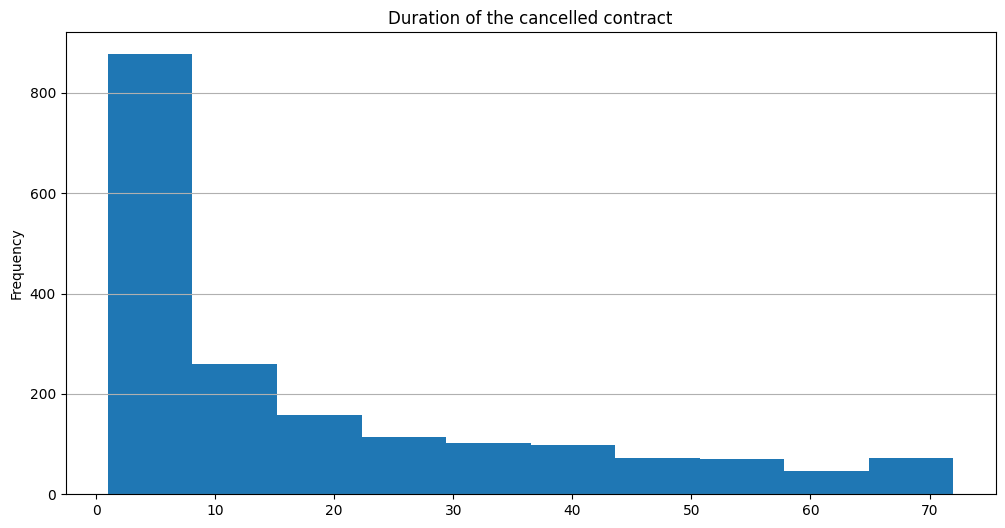

In [40]:

# Hacemos un histograma por la duracion de los contratos en meses.
df_master['contract_duration_months'].plot(kind='hist', title='Duration of the cancelled contract',xlabel='Months',figsize=[12,6])
plt.grid(axis='y')
plt.show()

Los clientes que se dieron de baja finalizaron sus contratos en menos de un año y la mayor cantidad de clientes lo hizo después de un solo mes.

### Gráfico de barras que muestra los contratos cancelados en contra a los vigentes y los tipos de contrato.

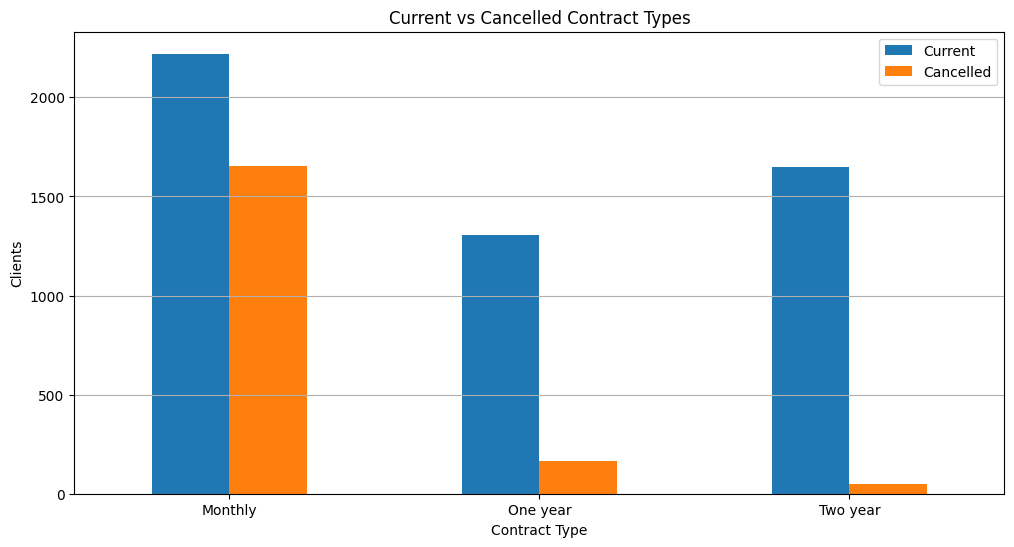

In [41]:
# Creamos una tabla pivote con los contratos vigentes y cancelados por su tipo de contrato
pivot_current_cancelled_contractType = df_master.pivot_table(columns='contract_cancelled',index='contract_type',values='customer_id',aggfunc='count')
pivot_current_cancelled_contractType.reset_index(inplace=True)

# Graficamos la tabla pivote
pivot_current_cancelled_contractType.plot(kind='bar',x='contract_type',title='Current vs Cancelled Contract Types',xlabel='Contract Type', ylabel='Clients',figsize=[12,6],rot=0)

plt.legend(['Current', 'Cancelled'])
plt.grid(axis='y')
plt.show()

### Gráfico de barras que muestra los contratos cancelados en contra a los vigentes y los tipos de pago.

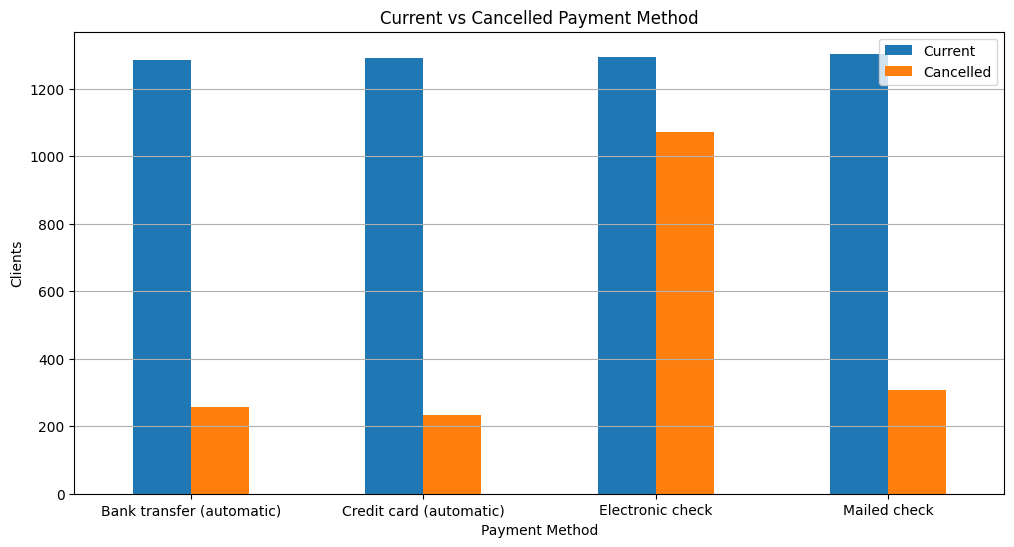

In [42]:
# Creamos una tabla pivote con los contratos vigentes y cancelados por su metodo de pago
pivot_current_cancelled_paymentMethod = df_master.pivot_table(columns='contract_cancelled',index='payment_method',values='contract_type',aggfunc='count')
pivot_current_cancelled_paymentMethod.reset_index(inplace=True)

# Graficamos la tabla pivote
pivot_current_cancelled_paymentMethod.plot(kind='bar',x='payment_method',title='Current vs Cancelled Payment Method',xlabel='Payment Method',ylabel='Clients',figsize=[12,6],rot=0)

plt.legend(['Current', 'Cancelled'])
plt.grid(axis='y')
plt.show()

La distribución de los clientes actuales es relativamente igual entre las cuatro opciones de pago diferentes pero destaca que la mayor cantidad clientes que han abandonado la empresa han utilizado cheques electrónicos para pagar.

### Diagramas de caja y bigotes que muestran la distribución de:
    - Cargos mensuales de clientes que han cancelado contrato.
    - Cargos totales de clientes que han cancelado contrato.
    - Cargos mensuales de clientes vigentes.
    - Cargos totales de clientes vigentes.

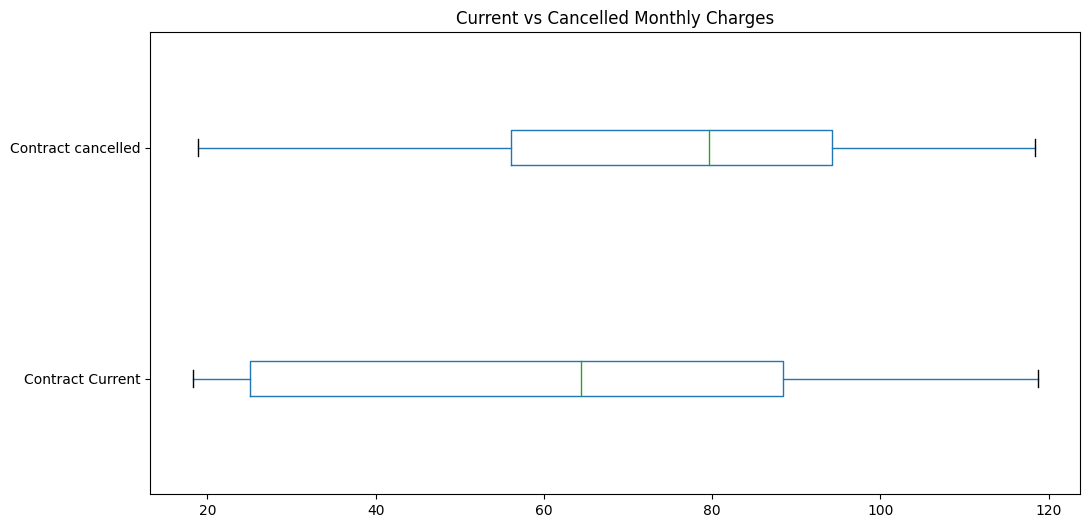

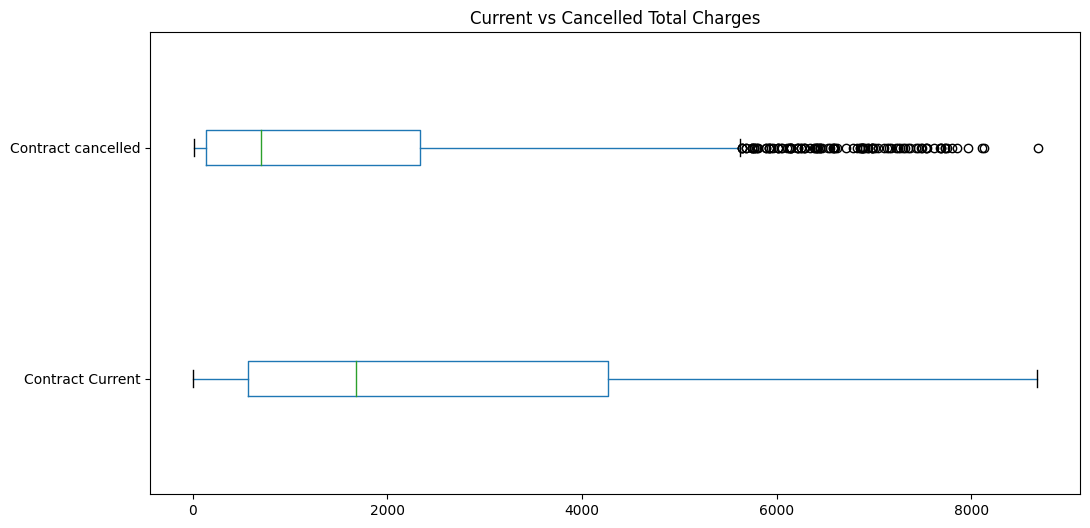

In [43]:
# Creamos una tabla pivote con los contratos vigentes y cancelados por sus cargos mensuales
pivot_current_cancelled_monthlyCharges = df_master.pivot_table(columns='contract_cancelled',index='customer_id',values='monthly_charges')
pivot_current_cancelled_monthlyCharges.reset_index(inplace=True)
pivot_current_cancelled_monthlyCharges.drop(labels='customer_id',axis=1,inplace=True)

# Creamos una tabla pivote con los contratos vigentes y cancelados por su cargos totales
pivot_current_cancelled_totalCharges = df_master.pivot_table(columns='contract_cancelled',index='customer_id',values='total_charges')
pivot_current_cancelled_totalCharges.reset_index(inplace=True)
pivot_current_cancelled_totalCharges.drop(labels='customer_id',axis=1,inplace=True)

# Graficamos las tablas pivotes
pivot_current_cancelled_monthlyCharges.plot(kind='box',title='Current vs Cancelled Monthly Charges',vert=False,figsize=[12,6])
plt.yticks([1,2],['Contract Current','Contract cancelled'])

pivot_current_cancelled_totalCharges.plot(kind='box',title='Current vs Cancelled Total Charges',vert=False,figsize=[12,6])
plt.yticks([1,2],['Contract Current','Contract cancelled'])

plt.show()

- En el primer grafico podemos ver que el contrato mensual promedio de los clientes que han abandonado el servicio tiende a ser más alto que el de los clientes actuales, aproximadamente 80 dólares en contra los 60 dolares contratados por los clientes con servicio viente

- En el grafico de 'total_charges', todos los clientes actuales se encuentran dentro de los límites del cuartil sin valores atípicos, mientras que los clientes que han abandonado el servicio han gastado menos dinero en promedio, pero los límites superiores que estan un poco por debajo de los $6000 dolares se consideran valores atípicos para aquellos clientes que han abandonado el servicio.

### Gráfico de barras que muestra la información personal de los clientes han cancelado contrato en contra a los clientes vigentes a traves de los valores totales por:
    - Género
    - si estan jubilados
    - si estan en pareja
    - si son dependientes

In [44]:
# Creamos una tabla pivote con el genero de los clientes con los contratos vigentes y cancelados por los cargos mensuales
pivot_current_cancelled_gender=df_master.pivot_table(columns='contract_cancelled',index='gender',values='monthly_charges',aggfunc='count')
pivot_current_cancelled_gender.reset_index(inplace=True)

# Creamos una tabla pivote con los clientes jubilados con los contratos vigentes y cancelados por los cargos mensuales
pivot_current_cancelled_seniorCitizen=df_master.pivot_table(columns='contract_cancelled',index='senior_citizen',values='monthly_charges',aggfunc='count')
pivot_current_cancelled_seniorCitizen.reset_index(inplace=True)

# Creamos una tabla pivote con los clientes en pareja con los contratos vigentes y cancelados por los cargos mensuales
pivot_current_cancelled_partner=df_master.pivot_table(columns='contract_cancelled',index='partner',values='monthly_charges',aggfunc='count')
pivot_current_cancelled_partner.reset_index(inplace=True)

# Creamos una tabla pivote con los clientes dependientes con los contratos vigentes y cancelados por los cargos mensuales
pivot_current_cancelled_dependets=df_master.pivot_table(columns='contract_cancelled',index='dependents',values='monthly_charges',aggfunc='count')
pivot_current_cancelled_dependets.reset_index(inplace=True)

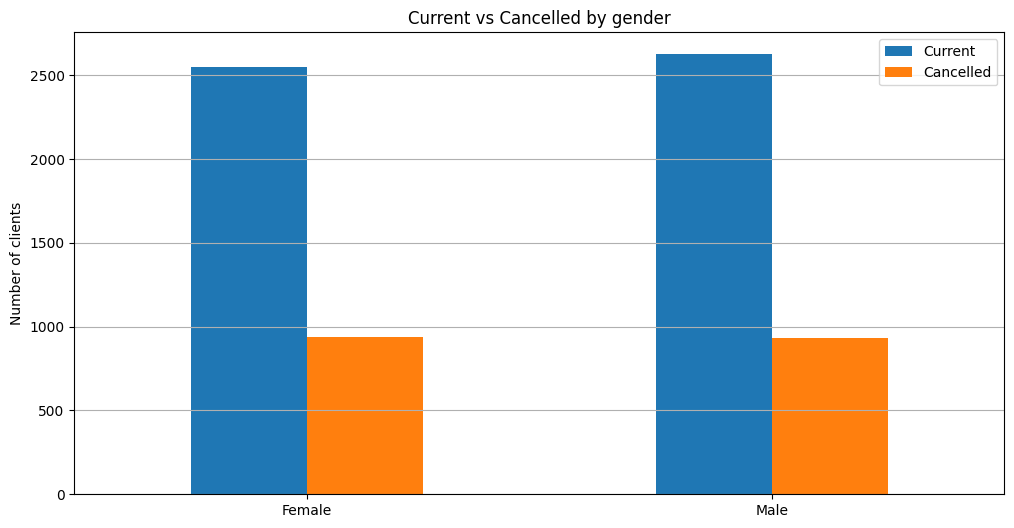

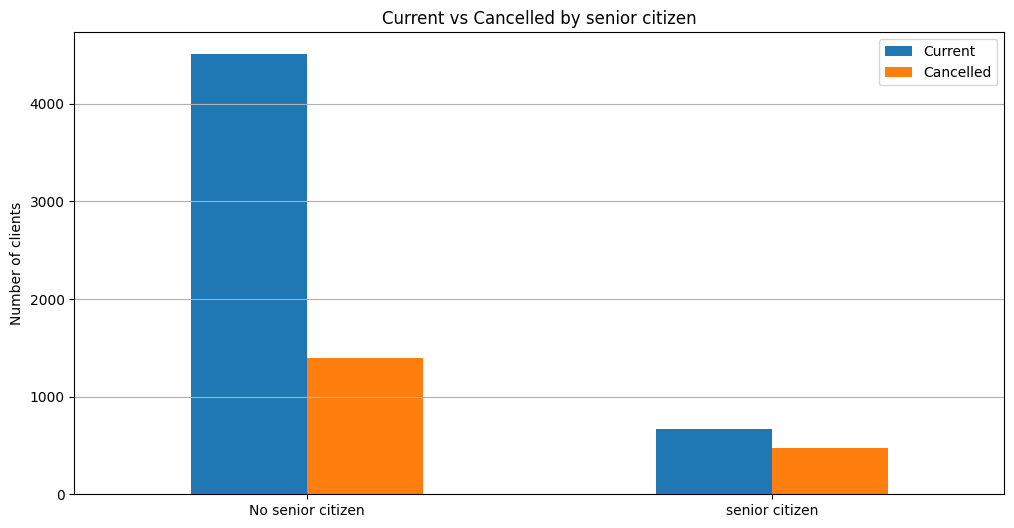

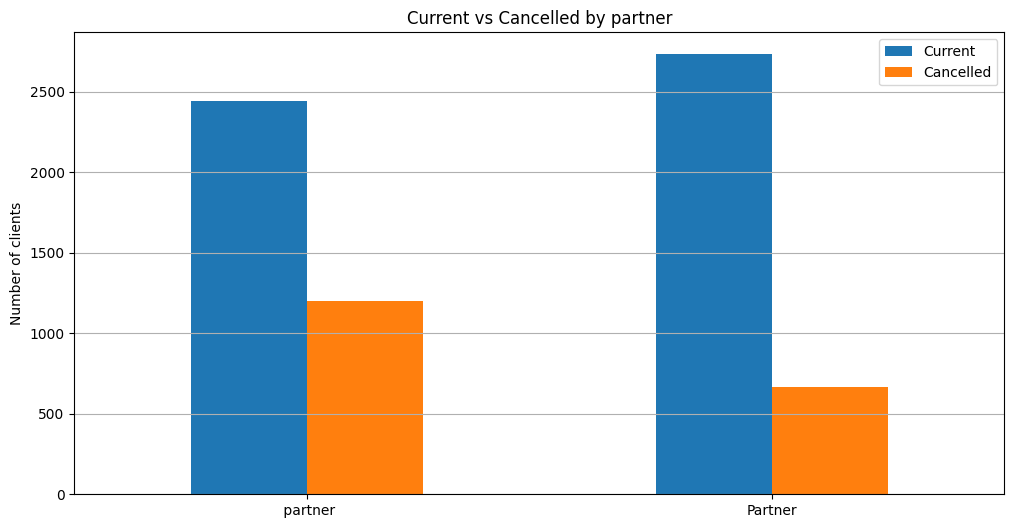

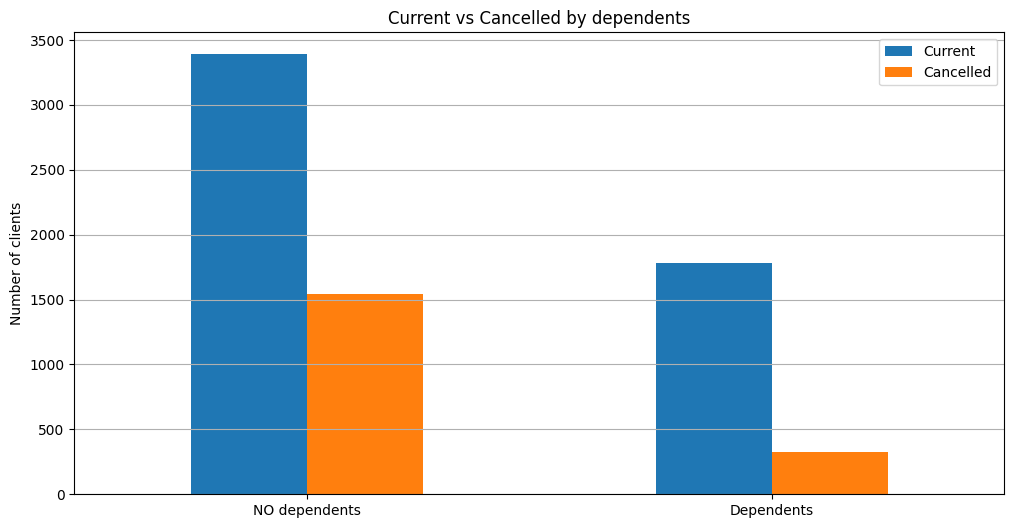

In [45]:
# Graficamos las tablas pivotes
pivot_current_cancelled_gender.plot(kind='bar',x='gender',title='Current vs Cancelled by gender',xlabel='',ylabel='Number of clients',figsize=[12,6],rot=0)
plt.xticks([0,1],['Female','Male'])
plt.legend(['Current','Cancelled'])
plt.grid(axis='y')

pivot_current_cancelled_seniorCitizen.plot(kind='bar',x='senior_citizen',title='Current vs Cancelled by senior citizen',xlabel='',ylabel='Number of clients',figsize=[12,6],rot=0)
plt.xticks([0,1],['No senior citizen','senior citizen'])
plt.legend(['Current','Cancelled'])
plt.grid(axis='y')

pivot_current_cancelled_partner.plot(kind='bar',x='partner',title='Current vs Cancelled by partner',xlabel='',ylabel='Number of clients',figsize=[12,6],rot=0)
plt.xticks([0,1],[' partner','Partner'])
plt.legend(['Current','Cancelled'])
plt.grid(axis='y')

pivot_current_cancelled_dependets.plot(kind='bar',x='dependents',title='Current vs Cancelled by dependents',xlabel='',ylabel='Number of clients',figsize=[12,6],rot=0)
plt.xticks([0,1],['NO dependents','Dependents'])
plt.legend(['Current','Cancelled'])

plt.grid(axis='y')
plt.show()

- En todos los graficos tenemos una distribución similar, ya que en la mayoría de los casos los clientes vigentes son muy superiores en numeros que los clientes que cancelaron el contrato.

- Tengamos en cuenta que en el 2do grafico podemos observar que los numeros de clientes vigentes tiene numeros muy bajos cuando el cliente es jubilado lo que puede deberse a que un estos clientes fallecieron, por lo que sus contratos se cancelarían.

- Destacar que hay diferencia mayor de clientes vigentes y otros que cancelaron el contrato cuando son dependientes o parejas. Esto podría deberse a que esos clientes pertenecen a un "hogar" donde tienen un presupuesto estable, por lo que tener un contrato constante es más conveniente y beneficioso para su situación social.

### - Gráfico de barras que muestra el tipo de contrato en relación con la información personal a traves de los valores totales por:
    - Género
    - si estan jubilados
    - si estan en pareja
    - si son dependientes

In [46]:
# Creamos una tabla pivote con el genero de los clientes por su tipo de contrato y los cargos mensuales.
pivot_contractType_gender=df_master.pivot_table(columns='contract_type',index='gender',values='monthly_charges',aggfunc='count')
pivot_contractType_gender.reset_index(inplace=True)

# Creamos una tabla pivote con los clientes jubilados por su tipo de contrato y los cargos mensuales.
pivot_contractType_seniorCitizen=df_master.pivot_table(columns='contract_type',index='senior_citizen',values='monthly_charges',aggfunc='count')
pivot_contractType_seniorCitizen.reset_index(inplace=True)

# Creamos una tabla pivote con los clientes en pareja por su tipo de contrato y los cargos mensuales.
pivot_contractType_partner=df_master.pivot_table(columns='contract_type',index='partner',values='monthly_charges',aggfunc='count')
pivot_contractType_partner.reset_index(inplace=True)

# Creamos una tabla pivote con los clientes dependientes por su tipo de contrato y los cargos mensuales.
pivot_contractType_dependents=df_master.pivot_table(columns='contract_type',index='dependents',values='monthly_charges',aggfunc='count')
pivot_contractType_dependents.reset_index(inplace=True)

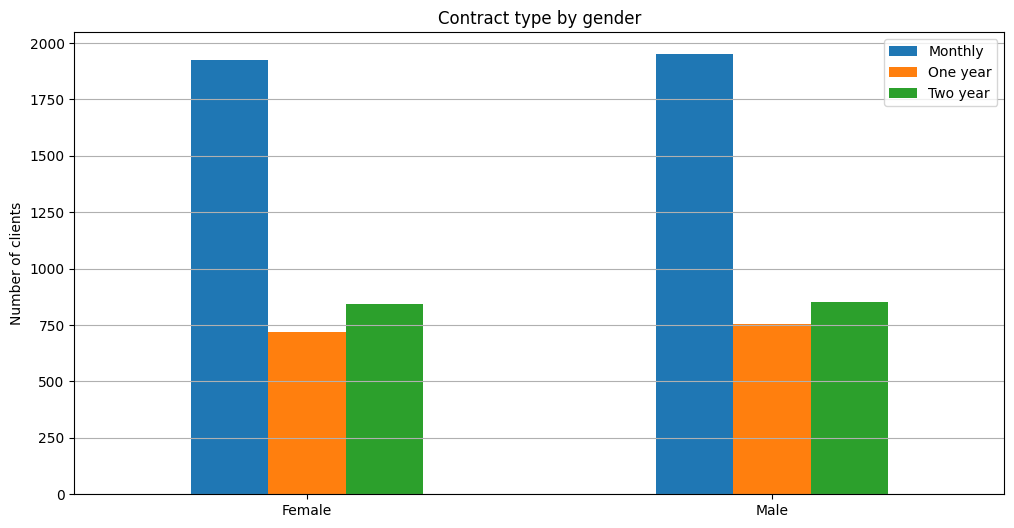

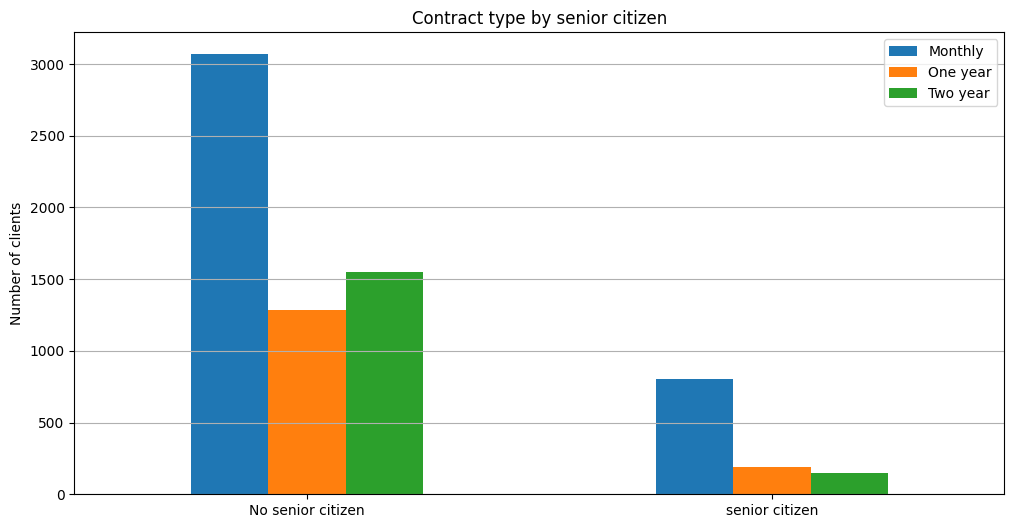

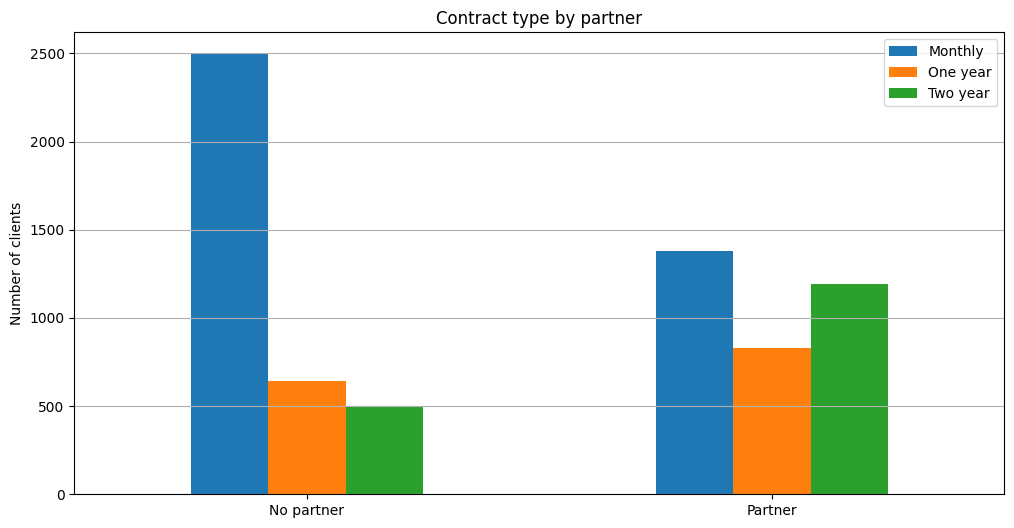

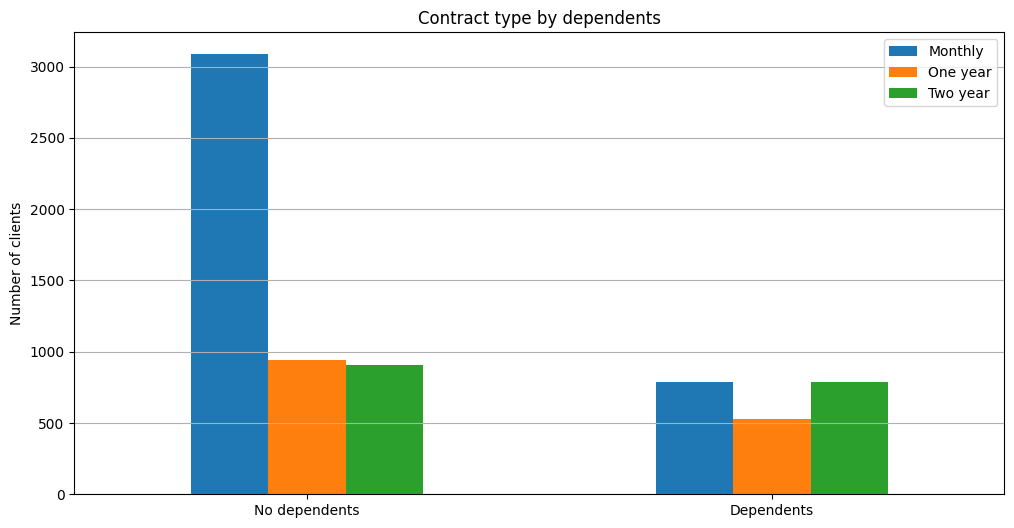

In [47]:
# Graficamos las tablas pivotes
pivot_contractType_gender.plot(kind='bar',x='gender',title='Contract type by gender',xlabel='',ylabel='Number of clients',figsize=[12,6],rot=0)
plt.xticks([0,1],['Female','Male'])
plt.legend(['Monthly','One year','Two year'])
plt.grid(axis='y')

pivot_contractType_seniorCitizen.plot(kind='bar',x='senior_citizen',title='Contract type by senior citizen',xlabel='',ylabel='Number of clients',figsize=[12,6],rot=0)
plt.xticks([0,1],['No senior citizen','senior citizen'])
plt.legend(['Monthly','One year','Two year'])
plt.grid(axis='y')

pivot_contractType_partner.plot(kind='bar',x='partner',title='Contract type by partner',xlabel='',ylabel='Number of clients',figsize=[12,6],rot=0)
plt.xticks([0,1],['No partner','Partner'])
plt.legend(['Monthly','One year','Two year'])
plt.grid(axis='y')


pivot_contractType_dependents.plot(kind='bar',x='dependents',title='Contract type by dependents',xlabel='',ylabel='Number of clients',figsize=[12,6],rot=0)
plt.xticks([0,1],['No dependents','Dependents'])
plt.legend(['Monthly','One year','Two year'])

plt.grid(axis='y')
plt.show()

- Los contratos mensuales son la opcion mas elegida en todos los casos de los clientes, los contratos anuales y de 2 años tienen numeros muy similares en la mayoria de los casos, en algunos otros hay una diferencia pero no muy considerable en comparacion.

- En el caso de los clientes dependientes y en pareja tienen un equilibrio en elegir los 3 tipos de contratos, esto se puede a deber a que sienten mas seguro con contratos de mayor duracion por la estabilidad que ofrecen.

### Gráfico de barras para los clientes que abandonaron y no abandonaron en relación con el tipo de servicio de Internet.

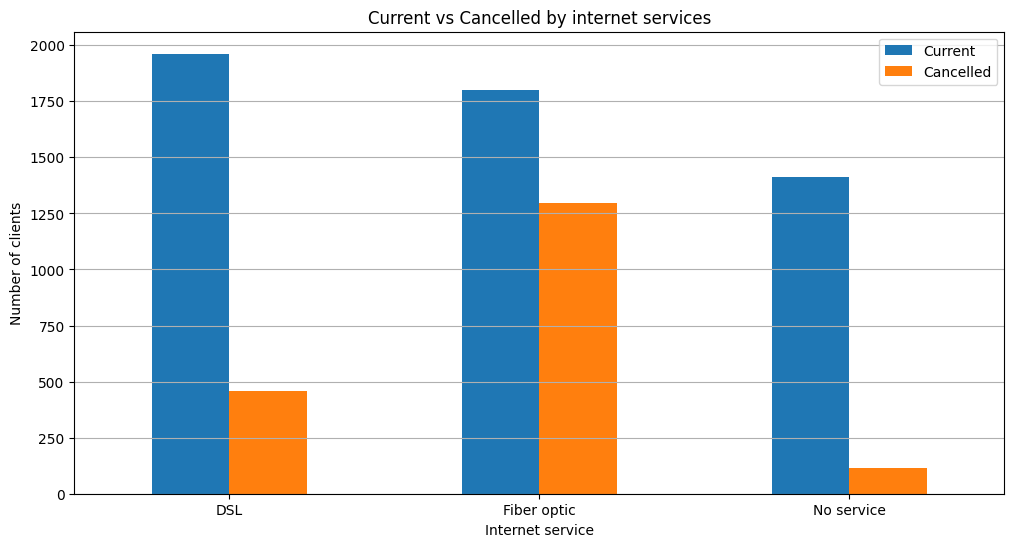

In [48]:
# Creamos una tabla pivote con los contratos vigentes y cancelados por servicio de internet.
pivot_current_cancelled_internetService = df_master.pivot_table(columns='contract_cancelled',index='internet_service',values='customer_id',aggfunc='count')
pivot_current_cancelled_internetService.reset_index(inplace=True)

# Graficamos la tabla pivote.
pivot_current_cancelled_internetService.plot(kind='bar',x='internet_service',title='Current vs Cancelled by internet services',figsize=[12,6],xlabel='Internet service',ylabel='Number of clients',rot=0)
plt.legend(['Current','Cancelled'])
plt.grid(axis='y')
plt.show()

- El servicio de internet más usado es el 'DSL'.
- EL servicio de internet con más contrato cancelados es el de fibra optica.
- Tenemos muchos clientes vigentes que no tienen ningun servicio.

### Gráfico de barras para el tipo de contrato en relación con el tipo de servicio de Internet.

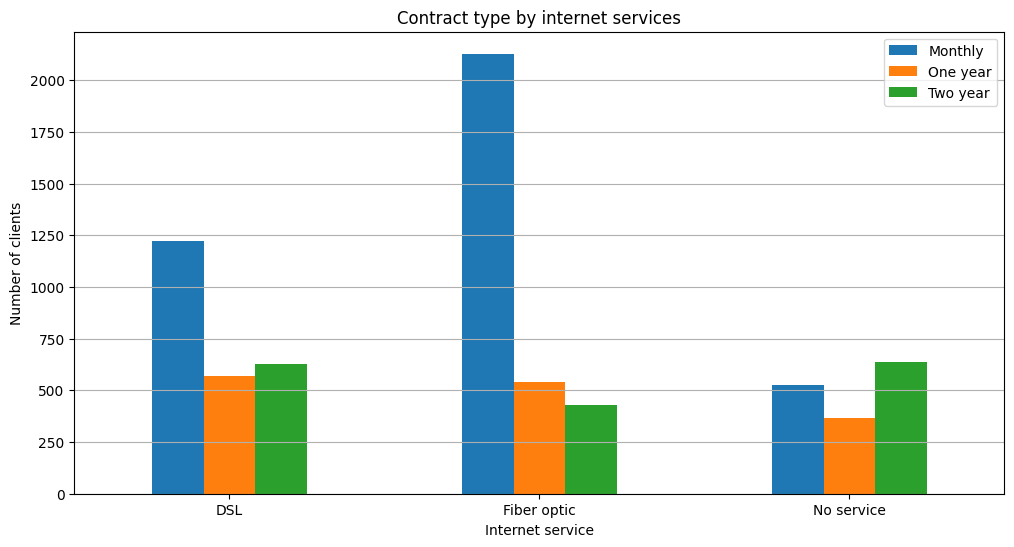

In [49]:
# Creamos una tabla pivote con los contratos vigentes y cancelados por servicio de internet.
pivot_contractType_internetService = df_master.pivot_table(columns='contract_type',index='internet_service',values='customer_id',aggfunc='count')
pivot_contractType_internetService.reset_index(inplace=True)

# Graficamos la tabla pivote.
pivot_contractType_internetService.plot(kind='bar',x='internet_service',title='Contract type by internet services',figsize=[12,6],xlabel='Internet service',ylabel='Number of clients',rot=0)
plt.legend(['Monthly','One year','Two year'])
plt.grid(axis='y')
plt.show()

- Nuevamente el contrato mensual es mas utilzado en los servicios de internet pero destaca en el servicio de fibra optica por mucho en comparacion al numero de clientes que en el servicio de DSL.
- Los contratos anuales y de 2 años tienen cifras muy similares en todos los servicios.


### Gráfico de barras que muestra los servicios de Internet y las multiples lineas telefonicas de los clientes que cancelaron contrato y estan vigentes a traves de los valores totales por:
    - Seguridad en línea
    - Copia de seguridad en línea
    - Protección de dispositivos
    - Soporte técnico
    - Transmisión de TV
    - Transmisión de películas
    - Multiples lineas telefonicas

In [50]:
# Creamos una tabla pivote con los contratos vigentes y cancelados por seguridad en linea.
pivot_current_cancelled_onlineSecurity = df_master.pivot_table(columns='contract_cancelled',index='online_security',values='monthly_charges',aggfunc='count')
pivot_current_cancelled_onlineSecurity.reset_index(inplace=True)

# Creamos una tabla pivote con los contratos vigentes y cancelados por respaldo en linea.
pivot_current_cancelled_onlineBackup = df_master.pivot_table(columns='contract_cancelled',index='online_backup',values='monthly_charges',aggfunc='count')
pivot_current_cancelled_onlineBackup.reset_index(inplace=True)

# Creamos una tabla pivote con los contratos vigentes y cancelados por proteccion de dispostivo.
pivot_current_cancelled_deviceProtection = df_master.pivot_table(columns='contract_cancelled',index='device_protection',values='monthly_charges',aggfunc='count')
pivot_current_cancelled_deviceProtection.reset_index(inplace=True)

# Creamos una tabla pivote con los contratos vigentes y cancelados por soporte de tecnologia.
pivot_current_cancelled_techSupport = df_master.pivot_table(columns='contract_cancelled',index='tech_support',values='monthly_charges',aggfunc='count')
pivot_current_cancelled_techSupport.reset_index(inplace=True)

# Creamos una tabla pivote con los contratos vigentes y cancelados por streaming TV.
pivot_current_cancelled_streamingTv = df_master.pivot_table(columns='contract_cancelled',index='streaming_tv',values='monthly_charges',aggfunc='count')
pivot_current_cancelled_streamingTv.reset_index(inplace=True)

# Creamos una tabla pivote con los contratos vigentes y cancelados por peliculas Streaming.
pivot_current_cancelled_streamingMovies = df_master.pivot_table(columns='contract_cancelled',index='streaming_movies',values='monthly_charges',aggfunc='count')
pivot_current_cancelled_streamingMovies.reset_index(inplace=True)

# Creamos una tabla pivote con los contratos vigentes y cancelados por multiples lineas.
pivot_current_cancelled_multiplesLines = df_master.pivot_table(columns='contract_cancelled',index='multiple_lines',values='monthly_charges',aggfunc='count')
pivot_current_cancelled_multiplesLines.reset_index(inplace=True)

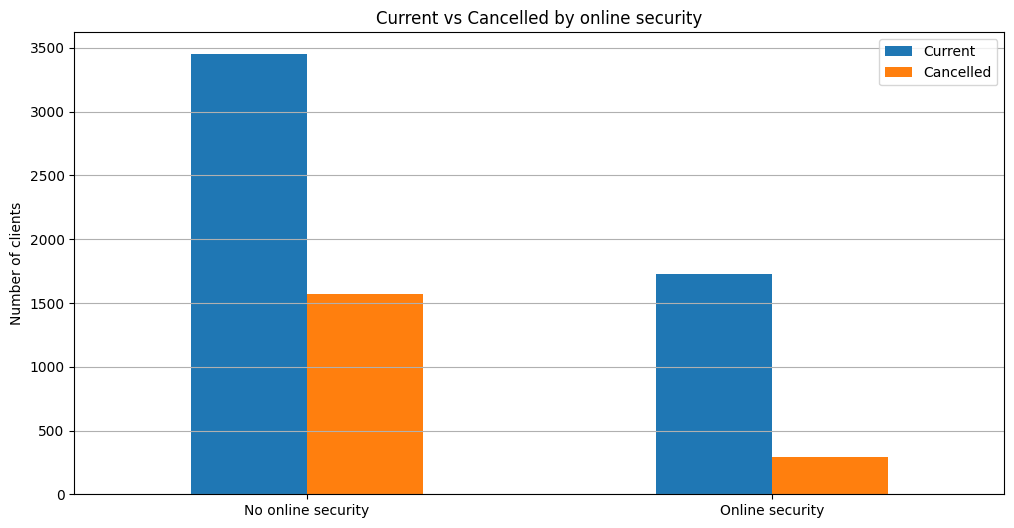

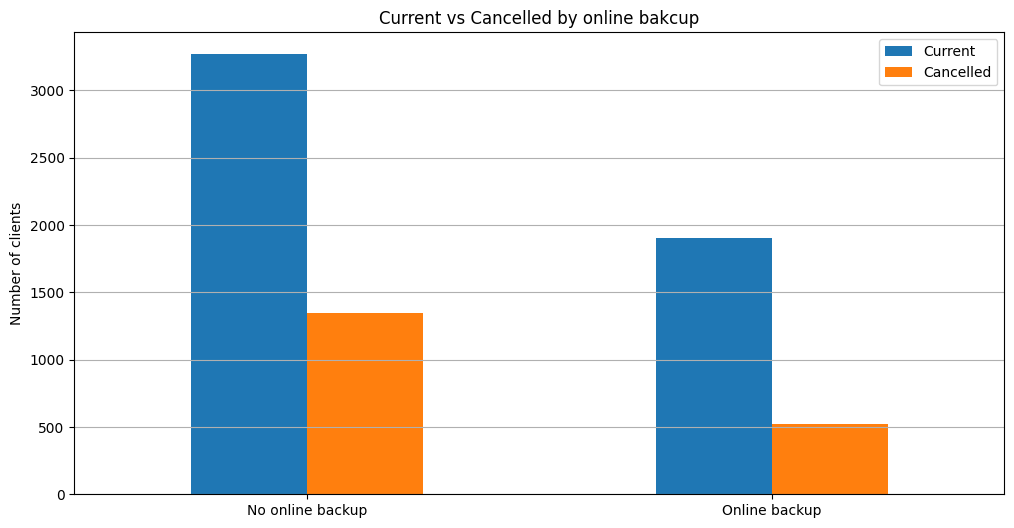

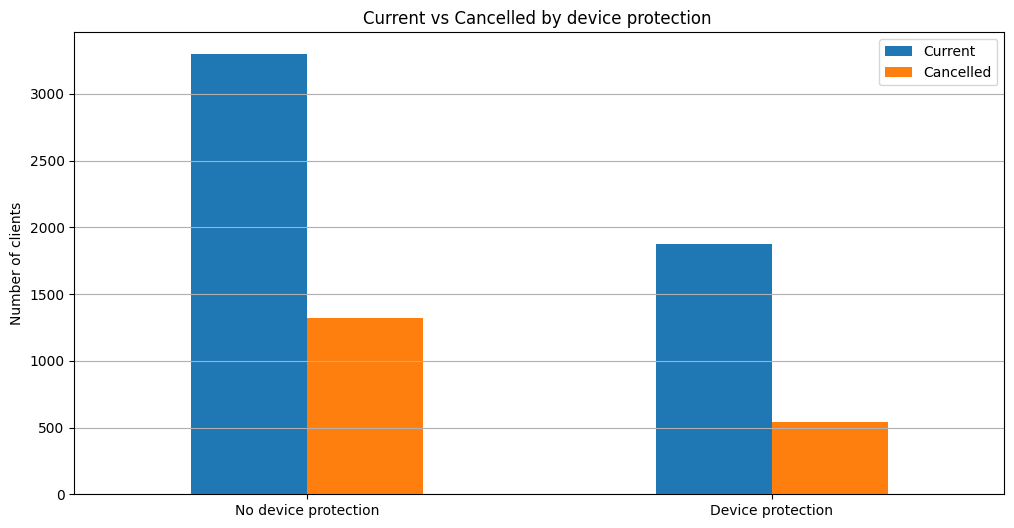

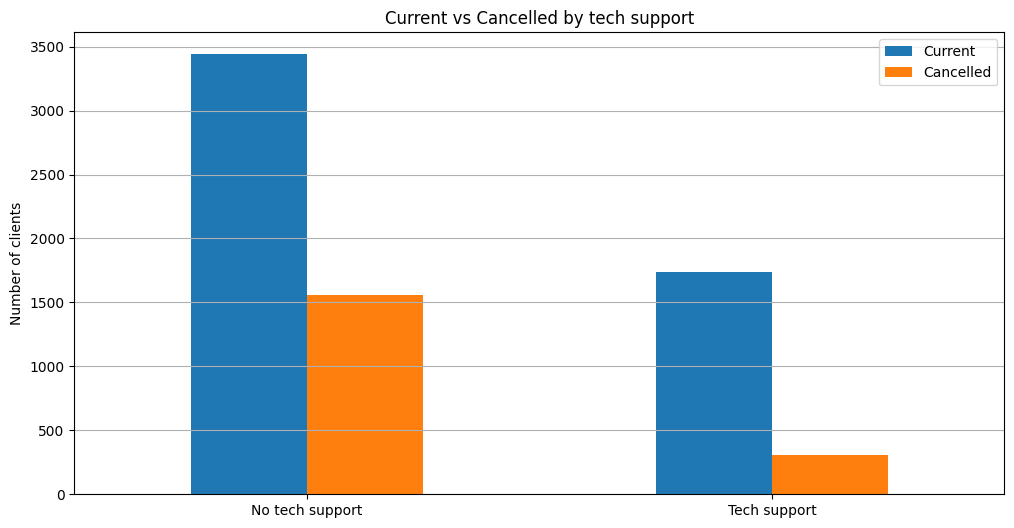

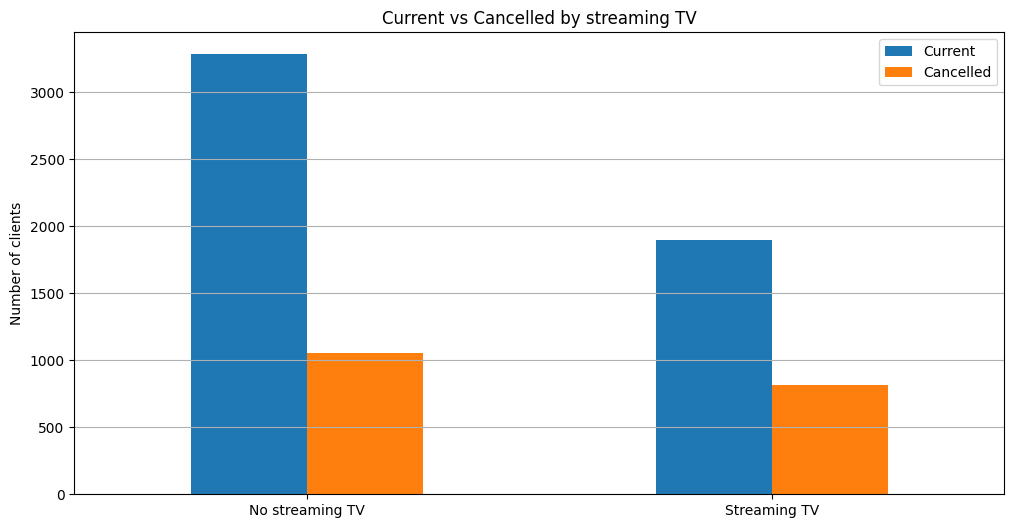

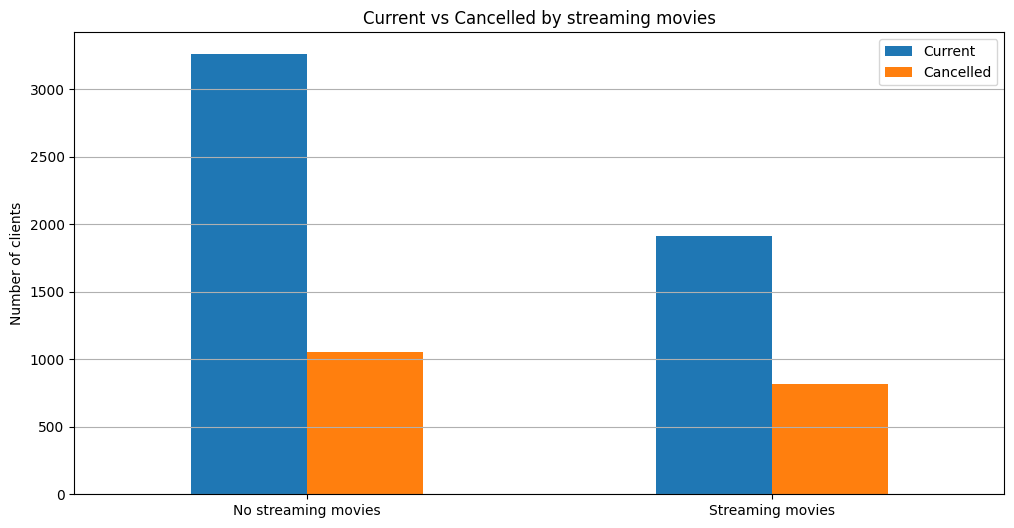

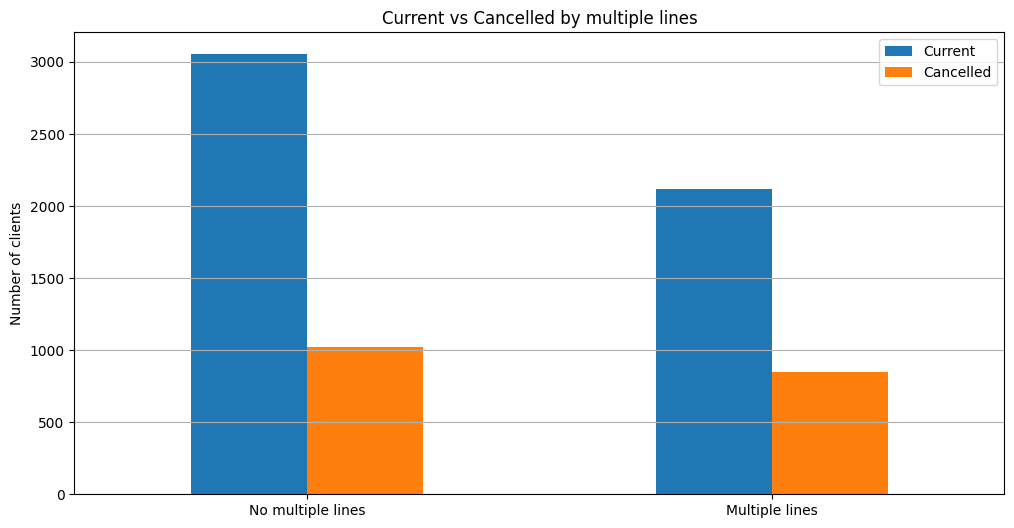

In [51]:
# Graficamos las tablas pivote.
pivot_current_cancelled_onlineSecurity.plot(kind='bar',x='online_security',title='Current vs Cancelled by online security',figsize=[12,6],xlabel='',ylabel='Number of clients',rot=0)
plt.xticks([0,1],['No online security','Online security'])
plt.legend(['Current','Cancelled'])
plt.grid(axis='y')

pivot_current_cancelled_onlineBackup.plot(kind='bar',x='online_backup',title='Current vs Cancelled by online bakcup',figsize=[12,6],xlabel='',ylabel='Number of clients',rot=0)
plt.xticks([0,1],['No online backup','Online backup'])
plt.legend(['Current','Cancelled'])
plt.grid(axis='y')

pivot_current_cancelled_deviceProtection.plot(kind='bar',x='device_protection',title='Current vs Cancelled by device protection ',figsize=[12,6],xlabel='',ylabel='Number of clients',rot=0)
plt.xticks([0,1],['No device protection','Device protection'])
plt.legend(['Current','Cancelled'])
plt.grid(axis='y')

pivot_current_cancelled_techSupport.plot(kind='bar',x='tech_support',title='Current vs Cancelled by tech support',figsize=[12,6],xlabel='',ylabel='Number of clients',rot=0)
plt.xticks([0,1],['No tech support','Tech support'])
plt.legend(['Current','Cancelled'])
plt.grid(axis='y')

pivot_current_cancelled_streamingTv.plot(kind='bar',x='streaming_tv',title='Current vs Cancelled by streaming TV',figsize=[12,6],xlabel='',ylabel='Number of clients',rot=0)
plt.xticks([0,1],['No streaming TV','Streaming TV'])
plt.legend(['Current','Cancelled'])
plt.grid(axis='y')

pivot_current_cancelled_streamingMovies.plot(kind='bar',x='streaming_movies',title='Current vs Cancelled by streaming movies',figsize=[12,6],xlabel='',ylabel='Number of clients',rot=0)
plt.xticks([0,1],['No streaming movies','Streaming movies'])
plt.legend(['Current','Cancelled'])
plt.grid(axis='y')

pivot_current_cancelled_multiplesLines.plot(kind='bar',x='multiple_lines',title='Current vs Cancelled by multiple lines',figsize=[12,6],xlabel='',ylabel='Number of clients',rot=0)
plt.xticks([0,1],['No multiple lines','Multiple lines'])
plt.legend(['Current','Cancelled'])
plt.grid(axis='y')

plt.show()

- Los clientes que cuentan con seguridad en línea, copias de seguridad en línea, protección de dispositivos y soporte técnico muestran una menor tasa de abandono que los que no los tienen. Esto podría deberse a que tienen más servicios que utilizan y de los que se benefician.

- Tenemos una gran cantidad de clientes que no utilizan estos servicios.

### Gráfico de barras que muestra el tipo de contrato de los clientes con los servicios de Internet y multiples lineas telefonicas a traves de los valores totales por:
    - Seguridad en línea
    - Copia de seguridad en línea
    - Protección de dispositivos
    - Soporte técnico
    - Transmisión de TV
    - Transmisión de películas
    - Multiples lineas telefonicas

In [52]:
# Creamos una tabla pivote con los contratos vigentes y cancelados por seguridad en linea.
pivot_contractType_onlineSecurity = df_master.pivot_table(columns='contract_type',index='online_security',values='monthly_charges',aggfunc='count')
pivot_contractType_onlineSecurity.reset_index(inplace=True)

# Creamos una tabla pivote con los contratos vigentes y cancelados por respaldo en linea.
pivot_contractType_onlineBackup = df_master.pivot_table(columns='contract_type',index='online_backup',values='monthly_charges',aggfunc='count')
pivot_contractType_onlineBackup.reset_index(inplace=True)

# Creamos una tabla pivote con los contratos vigentes y cancelados por proteccion de dispostivo.
pivot_contractType_deviceProtection = df_master.pivot_table(columns='contract_type',index='device_protection',values='monthly_charges',aggfunc='count')
pivot_contractType_deviceProtection.reset_index(inplace=True)

# Creamos una tabla pivote con los contratos vigentes y cancelados por soporte de tecnologia.
pivot_contractType_techSupport = df_master.pivot_table(columns='contract_type',index='tech_support',values='monthly_charges',aggfunc='count')
pivot_contractType_techSupport.reset_index(inplace=True)

# Creamos una tabla pivote con los contratos vigentes y cancelados por streaming TV.
pivot_contractType_streamingTv = df_master.pivot_table(columns='contract_type',index='streaming_tv',values='monthly_charges',aggfunc='count')
pivot_contractType_streamingTv.reset_index(inplace=True)

# Creamos una tabla pivote con los contratos vigentes y cancelados por peliculas Streaming.
pivot_contractType_streamingMovies = df_master.pivot_table(columns='contract_type',index='streaming_movies',values='monthly_charges',aggfunc='count')
pivot_contractType_streamingMovies.reset_index(inplace=True)

# Creamos una tabla pivote con los contratos vigentes y cancelados por multiples lineas.
pivot_contractType_multiplesLines = df_master.pivot_table(columns='contract_type',index='multiple_lines',values='monthly_charges',aggfunc='count')
pivot_contractType_multiplesLines.reset_index(inplace=True)

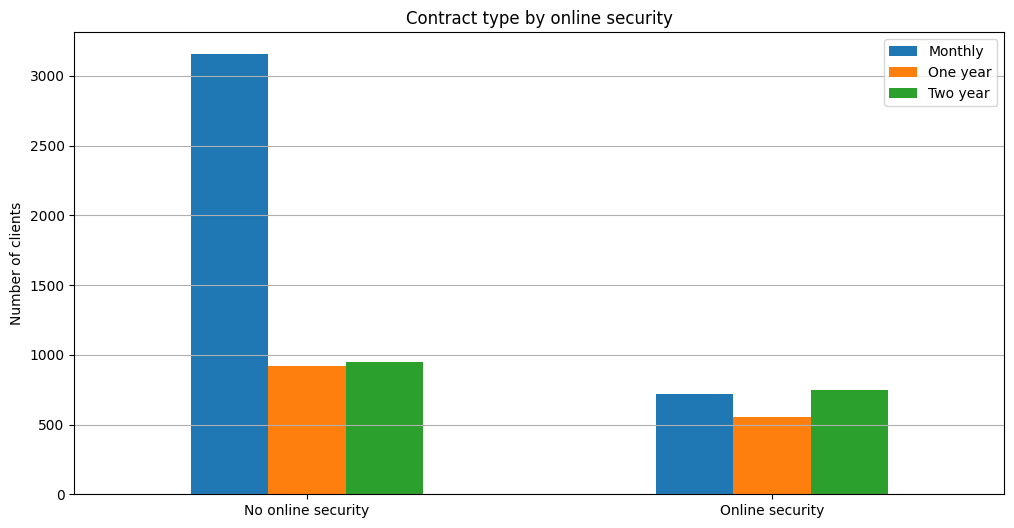

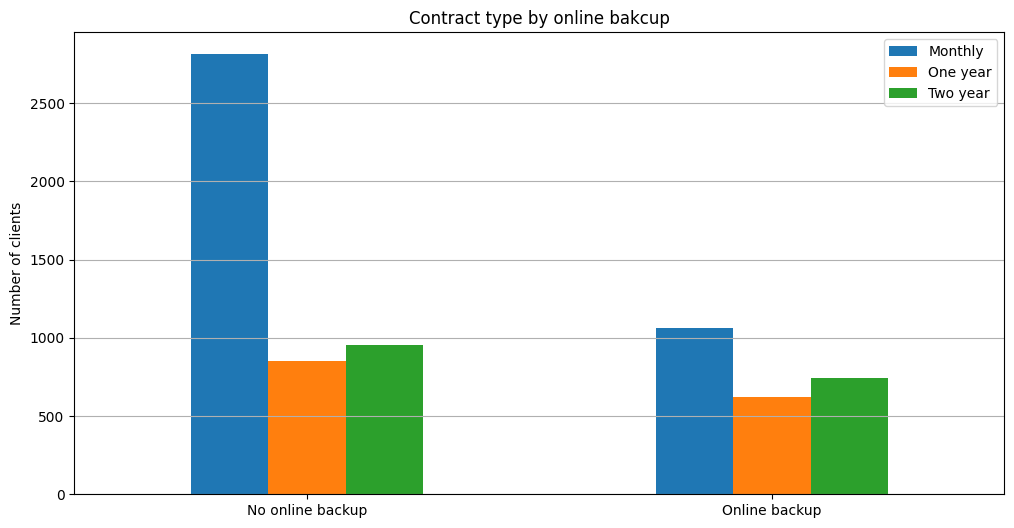

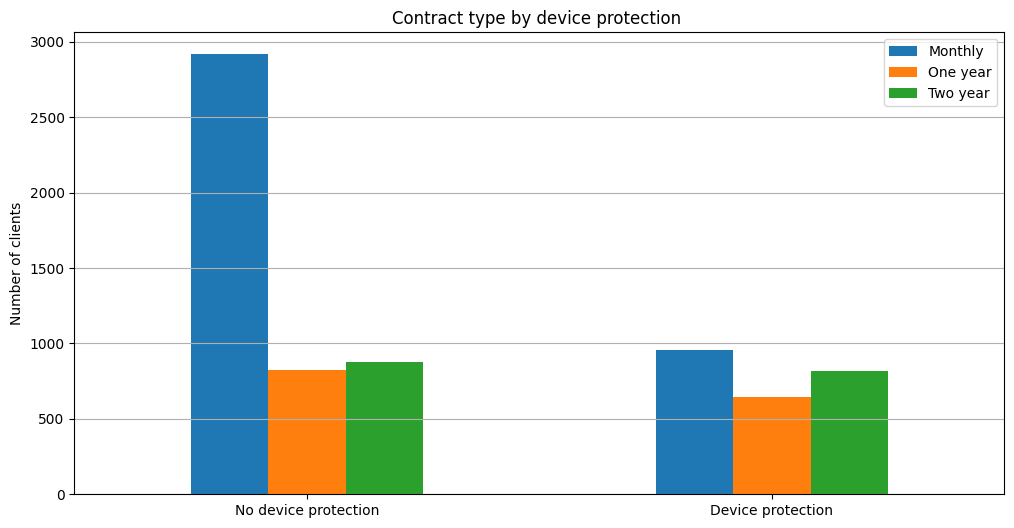

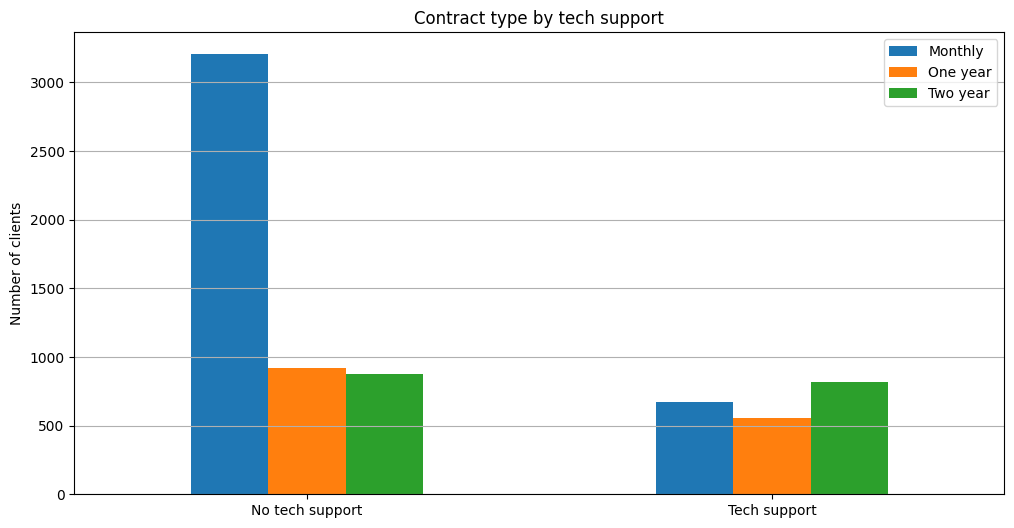

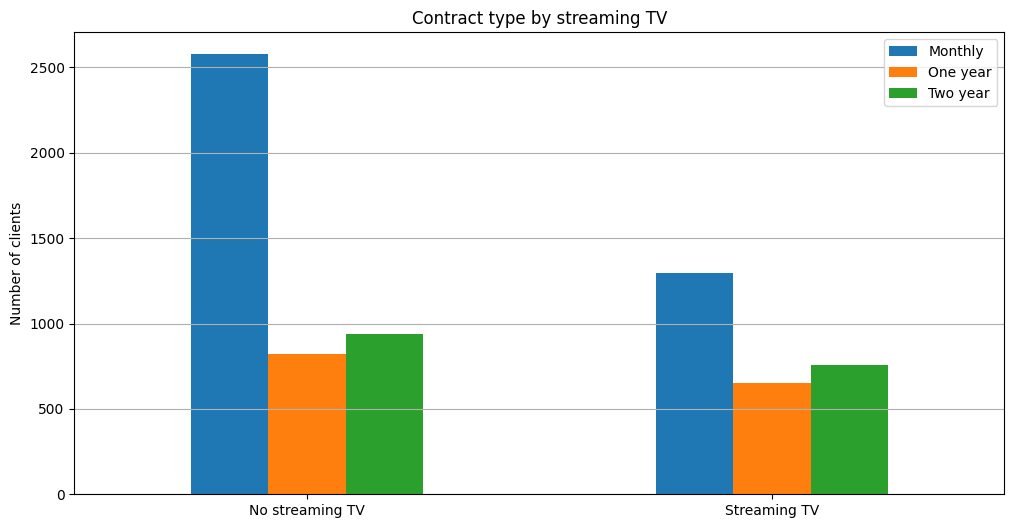

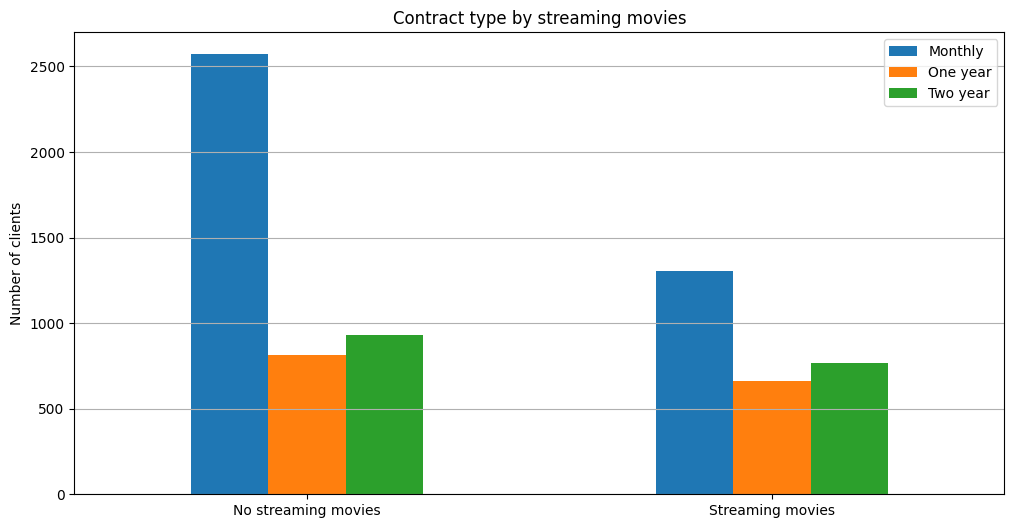

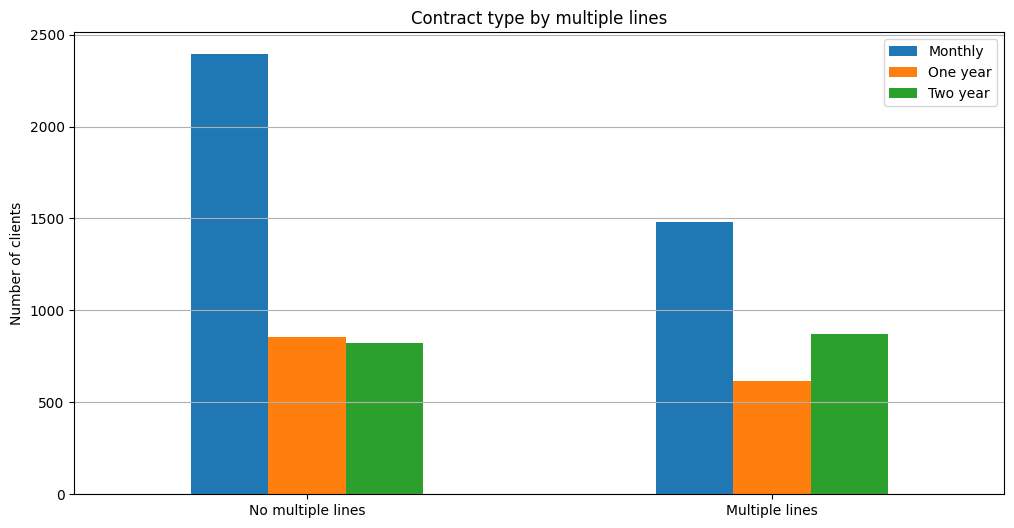

In [53]:
# Graficamos las tablas pivote.
pivot_contractType_onlineSecurity.plot(kind='bar',x='online_security',title='Contract type by online security',figsize=[12,6],xlabel='',ylabel='Number of clients',rot=0)
plt.xticks([0,1],['No online security','Online security'])
plt.legend(['Monthly','One year','Two year'])
plt.grid(axis='y')

pivot_contractType_onlineBackup.plot(kind='bar',x='online_backup',title='Contract type by online bakcup',figsize=[12,6],xlabel='',ylabel='Number of clients',rot=0)
plt.xticks([0,1],['No online backup','Online backup'])
plt.legend(['Monthly','One year','Two year'])
plt.grid(axis='y')

pivot_contractType_deviceProtection.plot(kind='bar',x='device_protection',title='Contract type by device protection ',figsize=[12,6],xlabel='',ylabel='Number of clients',rot=0)
plt.xticks([0,1],['No device protection','Device protection'])
plt.legend(['Monthly','One year','Two year'])
plt.grid(axis='y')

pivot_contractType_techSupport.plot(kind='bar',x='tech_support',title='Contract type by tech support',figsize=[12,6],xlabel='',ylabel='Number of clients',rot=0)
plt.xticks([0,1],['No tech support','Tech support'])
plt.legend(['Monthly','One year','Two year'])
plt.grid(axis='y')

pivot_contractType_streamingTv.plot(kind='bar',x='streaming_tv',title='Contract type by streaming TV',figsize=[12,6],xlabel='',ylabel='Number of clients',rot=0)
plt.xticks([0,1],['No streaming TV','Streaming TV'])
plt.legend(['Monthly','One year','Two year'])
plt.grid(axis='y')

pivot_contractType_streamingMovies.plot(kind='bar',x='streaming_movies',title='Contract type by streaming movies',figsize=[12,6],xlabel='',ylabel='Number of clients',rot=0)
plt.xticks([0,1],['No streaming movies','Streaming movies'])
plt.legend(['Monthly','One year','Two year'])
plt.grid(axis='y')

pivot_contractType_multiplesLines.plot(kind='bar',x='multiple_lines',title='Contract type by multiple lines',figsize=[12,6],xlabel='',ylabel='Number of clients',rot=0)
plt.xticks([0,1],['No multiple lines','Multiple lines'])
plt.legend(['Monthly','One year','Two year'])
plt.grid(axis='y')

plt.show()

- Podemos observar que los contratos mensuales como en graficos anteriores destacan por encima de los otros contratos.
- Los servicios que destacan en ambos casos son los de streaming aun que no por mucho de encima de los otros servicios.

## Ingeniería de características

Creamos las nuevas columnas para obtener metricas adicionales de los datos otorgados.

### Deteminar cantidad de servicios por cliente.

In [54]:
# Mostramos la informacion del DataFrame maestro para repasar las columnas.
print(df_master.columns.values)

['customer_id' 'begin_date' 'end_date' 'contract_type' 'paperless_billing'
 'payment_method' 'monthly_charges' 'total_charges'
 'contract_duration_months' 'contract_cancelled' 'gender' 'senior_citizen'
 'partner' 'dependents' 'internet_service' 'online_security'
 'online_backup' 'device_protection' 'tech_support' 'streaming_tv'
 'streaming_movies' 'has_internet' 'multiple_lines' 'phone_service']


In [55]:
# Creamos la columna de número de servicios.
df_master['number_services'] = df_master['online_security'] + df_master['online_backup'] + df_master['device_protection'] + df_master['tech_support'] + df_master['streaming_tv'] + df_master['streaming_movies'] + df_master['has_internet'] + df_master['multiple_lines'] + df_master['phone_service']
df_master['number_services'] = df_master['number_services'].astype(int)

### Determinar meses restantes de los contratos.

In [56]:
# Define contract length based on latest begin_date
now = df_master['begin_date'].max()
df_master['end_date'] = df_master['end_date'].fillna(now)
length = ((df_master['end_date'] - df_master['begin_date']) / numpy.timedelta64(1, 'D'))
length = length / 30.4375
df_master['contract_tenure'] = length.round()
df_master['contract_tenure'] = df_master['contract_tenure'].astype(int)


In [57]:
# Creamos la columna de meses restantes en los contratos.
remaining_months = []

# Recorremos el DataFrame con un ciclo for
for index, row in df_master.iterrows():
    # Si el dato es 'monthly' agregara un 0 al array
    if row['contract_type'] == 'Monthly':
        remaining_months.append(0)
    # Si el dato es 'One year' se declarara la variable 'months' que sera la resta de los meses de un año menos la duracion del contrato
    # Esta decision ira aumentando en 12 meses cada vez (un año = 12 meses)  
    elif row['contract_type'] == 'One year':
        if row['contract_tenure'] <= 12:
            months = 12 - row['contract_tenure']
            remaining_months.append(months)
        elif row['contract_tenure'] > 12 and row['contract_tenure'] <= 24:
            months = 24 - row['contract_tenure']
            remaining_months.append(months)
        elif row['contract_tenure'] > 24 and row['contract_tenure'] <= 36:
            months = 36 - row['contract_tenure']
            remaining_months.append(months)
        elif row['contract_tenure'] > 36 and row['contract_tenure'] <= 48:
            months = 48 - row['contract_tenure']
            remaining_months.append(months)
        elif row['contract_tenure'] > 48 and row['contract_tenure'] <= 60:
            months = 60 - row['contract_tenure']
            remaining_months.append(months)
        elif row['contract_tenure'] > 60 and row['contract_tenure'] <= 72:
            months = 72 - row['contract_tenure']
            remaining_months.append(months)
    # Si el dato es 'Two year' se declarara la variable 'months' que sera la resta de los meses de un año menos la duracion del contrato
    # Esta decision ira aumentando en 24 meses cada vez (2 años = 24 meses)  
    elif row['contract_type'] == 'Two year':
        if row['contract_tenure'] <= 24:
            months = 24 - row['contract_tenure']
            remaining_months.append(months)
        elif row['contract_tenure'] > 24 and row['contract_tenure'] <= 48:
            months = 48 - row['contract_tenure']
            remaining_months.append(months)
        elif row['contract_tenure'] > 48 and row['contract_tenure'] <= 72:
            months = 72 - row['contract_tenure']
            remaining_months.append(months)

# Creamos la columna con nuestrao array y la dejamos como datos enteros.
df_master['remaining_months'] = remaining_months
df_master['remaining_months'] = df_master['remaining_months'].astype(int)

### Determianar el promedio de cargos por cliente y cargos adicionales.

In [58]:
# Creamos la columna 'average_charge'
df_master['average_charge'] = (df_master['total_charges'] / df_master['contract_duration_months']).round()
# Obtenemos la mediana de la columna 'average_charge'
median = df_master['average_charge'].median()
# Rellenamos los datos nulos con la mediana obtenida anteriormente,
df_master['average_charge'] = df_master['average_charge'].fillna(median)

In [59]:
# Calculamos los cargos adicionales restando cargos totales con los cargos mensuale por la duracion del contrato.
df_master['additional_charges'] = df_master['total_charges'] - (df_master['monthly_charges'] * df_master['contract_duration_months'])

In [60]:
median_additional = df_master['additional_charges'].median()
# Rellenamos los datos nulos con la mediana obtenida anteriormente,
df_master['additional_charges'] = df_master['additional_charges'].fillna(median)

In [61]:
# Comprobamos si hay datos nulos en el DataFrame
print('Comprobamos si hay datos nulos.')
print(df_master['additional_charges'].isnull().sum())

Comprobamos si hay datos nulos.
0


### Determinar precio por servicio

In [62]:
# Calculamos el precio por servicio.
df_master['price_per_service'] = (df_master['monthly_charges'] / df_master['number_services'])

### Aplicar codificacion de datos.

In [63]:
# Eliminamos las columnas que no utilizaremos
data = df_master.drop(['customer_id', 'begin_date', 'end_date','contract_duration_months'], axis=1)
# Realizamos OHE
df_ohe = pandas.get_dummies(data, drop_first=True)

In [64]:
# Comprobamos si hay datos nulos en el DataFrame
print('Comprobamos si hay datos nulos.')
print(df_ohe.isnull().sum())

Comprobamos si hay datos nulos.
paperless_billing                         0
monthly_charges                           0
total_charges                             0
contract_cancelled                        0
gender                                    0
senior_citizen                            0
partner                                   0
dependents                                0
online_security                           0
online_backup                             0
device_protection                         0
tech_support                              0
streaming_tv                              0
streaming_movies                          0
has_internet                              0
multiple_lines                            0
phone_service                             0
number_services                           0
contract_tenure                           0
remaining_months                          0
average_charge                            0
additional_charges                        0


## Entrenamiento de modelo

- Comenzamos con crear los conjuntos de entrenamineto.

### Conjuntos de entrenamiento, validacion y test.

- Creando los conjuntos de entrenamiento, validacion y test procederemos con separar las caracteristicas (features) y el objetivo (target) para los conjuntos de OneHotEncoder (OHE).

In [65]:
# Dividmos el conjunto en 3 conjuntos con proporcion 3:1:1.
# Obtenemos el conjunto de 'test' y dejamos otro conjunto llamado 'rest'.
rest,test=train_test_split(df_ohe,test_size=0.2,random_state=54321)
# Del conjunto 'rest' obtendemos el conjunto de entrenamiento y validacion.
train,valid=train_test_split(rest,test_size=0.25,random_state=54321)

#Entrenamiento
features_train=train.drop(['contract_cancelled'],axis=1)
target_train=train['contract_cancelled']
#Validacion
features_valid=valid.drop(['contract_cancelled'],axis=1)
target_valid= valid['contract_cancelled']
#Prueba
features_test=test.drop(['contract_cancelled'],axis=1)
target_test=test['contract_cancelled']

In [66]:
# Comprobamos si hay datos nulos en el DataFrame
print('Comprobamos si hay datos nulos.')
print(train.isnull().sum())

Comprobamos si hay datos nulos.
paperless_billing                         0
monthly_charges                           0
total_charges                             0
contract_cancelled                        0
gender                                    0
senior_citizen                            0
partner                                   0
dependents                                0
online_security                           0
online_backup                             0
device_protection                         0
tech_support                              0
streaming_tv                              0
streaming_movies                          0
has_internet                              0
multiple_lines                            0
phone_service                             0
number_services                           0
contract_tenure                           0
remaining_months                          0
average_charge                            0
additional_charges                        0


In [67]:
log_reg = sm.Logit(target_train, features_train).fit() 

Optimization terminated successfully.
         Current function value: 0.183306
         Iterations 9


In [68]:
display(log_reg.summary()) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     contract_cancelled   No. Observations:                 4225
Model:                          Logit   Df Residuals:                     4196
Method:                           MLE   Df Model:                           28
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                  0.6812
Time:                        14:16:25   Log-Likelihood:                -774.47
converged:                       True   LL-Null:                       -2429.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
paperless_billing                          0.1549      0.163      0.948      0.343      -0.165       0.475
monthly_charges                           -0.0317      0.067     -0.475      0.635      -0.163       0.099
total_charges                              0.0006      0.000      4.077      0.000       0.000       0.001
gender                                    -0.0902      0.139     -0.648      0.517      -0.363       0.183
senior_citizen                             0.1480      0.180      0.824      0.410      -0.204       0.500
partner                                    0.0168      0.168      0.100      0.920      -0.313       0.346
dependents                                 0.0187      0.186      0.100      0.920      -0.347       0.384
online_security                           -0.7582        nan        nan        nan         nan         nan
online_backup                             -0.4612        nan        nan        nan         nan         nan
device_protection                         -0.3142        nan        nan        nan         nan         nan
tech_support                              -0.6140        nan        nan        nan         nan         nan
streaming_tv                               0.2409        nan        nan        nan         nan         nan
streaming_movies                          -0.0605        nan        nan        nan         nan         nan
has_internet                               2.7128        nan        nan        nan         nan         nan
multiple_lines                            -0.0166        nan        nan        nan         nan         nan
phone_service                             -0.4000        nan        nan        nan         nan         nan
number_services                            0.3290        nan        nan        nan         nan         nan
contract_tenure                           -0.0452      0.012     -3.748      0.000      -0.069      -0.022
remaining_months                           0.0073      0.032      0.232      0.817      -0.055       0.069
average_charge                             0.0278      0.006      4.391      0.000       0.015       0.040
additional_charges                        -0.0760      0.003    -23.326      0.000      -0.082      -0.070
price_per_service                         -0.0292      0.035     -0.836      0.403      -0.098       0.039
contract_type_One year                    -0.5980      0.285     -2.097      0.036      -1.157      -0.039
contract_type_Two year                    -1.9201      0.427     -4.502      0.000      -2.756      -1.084
payment_method_Credit card (automatic)     0.1612      0.242      0.666      0.505      -0.313       0.636
payment_method_Electronic check            0.5552      0.206      2.689      0.007       0.151       0.960
payment_method_Mailed check                0.3063      0.255      1.201      0.230      -0.194       0.806
internet_service_Fiber optic   

## Escalamos los datos numericos.

In [69]:
# Estandarizamos los datos con el StandardScaler
scaler = StandardScaler()

numeric = ['monthly_charges','total_charges', 'contract_tenure', 'number_services', 'remaining_months', 'average_charge', 'additional_charges']

scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])


### Modelo: Arbol de decision.

In [70]:
# Declaramos variables para medir mce y exactitud de los modelos.
best_score_tree=0
best_depth_tree=0
best_roc_tree=0
for depth_tree in range(1,20): # Seleccionamos el rango del hiperparámetro.
    model_tree= DecisionTreeClassifier(max_depth=depth_tree,random_state=12345) # Declaramos el modelo.
    model_tree.fit(features_train,target_train) # Entrenamos el modelo en el conjunto de entrenamiento.
    predictions_valid_tree = model_tree.predict(features_valid) # Obtenemos las predicciones del modelo en el conjunto de validación.
    score_tree= model_tree.score(features_test,target_test) # Calculamos la puntuacion de accuracy en el conjunto de test.
    roc_tree = roc_auc_score(target_valid, predictions_valid_tree)
    if roc_tree > best_roc_tree:
        best_depth_tree = depth_tree
        best_roc_tree = roc_tree
        best_score_tree=score_tree # Guardamos la mejor puntuacion de accurracy en el conjunto de validación.
        

print("La mejor profundidad es de:", best_depth_tree)
print("El mejor ROC-AUC-SCORE es de:",best_roc_tree)
print("La exactitud del mejor modelo en el conjunto de pruebas es de : {}".format(best_score_tree))

La mejor profundidad es de: 2
El mejor ROC-AUC-SCORE es de: 1.0
La exactitud del mejor modelo en el conjunto de pruebas es de : 1.0


### Modelos: Bosque aleatorio

In [71]:
# Declaramos variables para medir mce y exactitud de los modelos.
best_score_forest=0
best_est_score_forest=0
best_depth_forest=0
best_roc_forest=0
for est_forest in range(5,20,5): # Entrenaremos 20 modelos en intervalos de 5
    for depth_forest in range (1,5): # La profundidad de los arboles sera de 1 a 5
        model_forest=RandomForestClassifier(random_state=54321,n_estimators=est_forest, max_depth=depth_forest) # Configuramos el numero de arboles.
        model_forest.fit(features_train,target_train) # Entrenamos el modelo con el conjunto de entrenamiento.
        predictions_valid_forest= model_forest.predict(features_valid) # Realizamos prediciones con el conjunto de validación.

        score_forest= model_forest.score(features_test,target_test) # Calculamos la puntuacion de accuracy en el conjunto de test.
        roc_forest = roc_auc_score(target_valid, predictions_valid_forest)
        if roc_forest>best_roc_forest:
            best_roc_forest = roc_forest
            best_score_forest=score_forest # Guardamos la mejor puntuacion de accurracy en el conjunto de validación.
            best_est_score_forest=est_forest # Guardamos el número de estimadores que corresponden a la mejor punturación de exactitud.
            best_est_mse_forest=est_forest # Guardamos el número de estimadores que corresponden a la mejor prueba de MCE.
            best_depth_forest = depth_forest # Guardamos la mejor profundidad para los arboles del bosque.
            
print("El modelo con la mejor profundidad es de:", best_depth_forest)
print("El mejor ROC-AUC-SCORE es de:",best_roc_forest)
print("La exactitud del mejor modelo en el conjunto de pruebas con n_estimators(estimadores) {}) es de : {}".format(best_est_score_forest, best_score_forest))

El modelo con la mejor profundidad es de: 4
El mejor ROC-AUC-SCORE es de: 0.9959893048128342
La exactitud del mejor modelo en el conjunto de pruebas con n_estimators(estimadores) 15) es de : 0.9992902767920511


### Modelo: Regresion Logistica.

In [72]:
model_lr = LogisticRegression()
model_lr.fit(features_train, target_train)

predict_lr = model_lr.predict(features_valid)
roc_lr = roc_auc_score(target_valid, predict_lr)

print("El mejor ROC-AUC-SCORE es de:",roc_lr)

El mejor ROC-AUC-SCORE es de: 0.946524064171123


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Modelo: CatBoost Classifier.

In [73]:
model_cbc = CatBoostClassifier(iterations=434,learning_rate=0.64,depth=3,loss_function='Logloss',verbose=False,random_seed=42)
model_cbc.fit(features_train,target_train)

predict_cbc = model_cbc.predict(features_valid)

roc_cbc = roc_auc_score(target_valid,predict_cbc)

print("El mejor ROC-AUC-SCORE es de:",roc_cbc)

El mejor ROC-AUC-SCORE es de: 0.9986631016042781


### Modelo: LightGMB Gradiant Boosted Decision Tree Classifier.

In [75]:
model_bdtc = LGBMClassifier(boosting_type='gbdt', num_leaves=2, max_depth=500, learning_rate=0.51, n_estimators=256, subsample=0.4,objective='binary')
model_bdtc.fit(features_train, target_train)

predict_bdtc = model_bdtc.predict(features_valid)

roc_bdtc = roc_auc_score(target_valid, predict_bdtc)

print("El mejor ROC-AUC-SCORE es de:",roc_bdtc)

El mejor ROC-AUC-SCORE es de: 1.0


- Podemos observar que obtenemos metricas por encima del 90% como habiamos estimado en el plan de trabajo.

In [89]:
roc_models={
    'Tree Classifier': [roc_tree],
    'Random Forest': [roc_forest],
    'Logistic Regression' : [roc_lr],
    'CatBoost' : [roc_cbc],
    'LGBM Classifier' : [roc_bdtc]
}

df_models.set_index
df_models = pandas.DataFrame(roc_models)
display(df_models)

,Tree Classifier,Random Forest,Logistic Regression,CatBoost,LGBM Classifier
0,1.0,0.995989,0.946524,0.998663,1.0


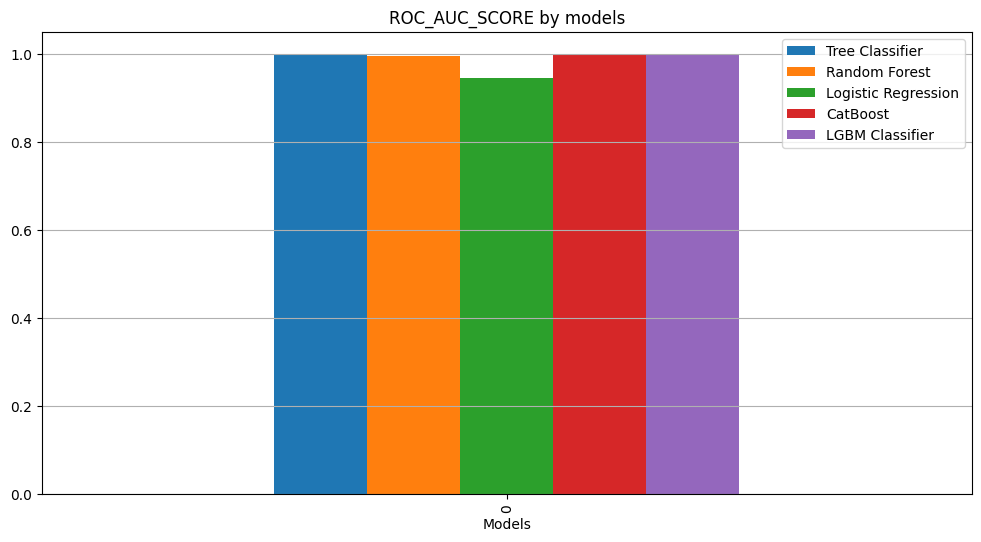

In [93]:
# Hacemos un grafico de los modelos por su ROC_AUC_SCORE.
df_models.plot(kind='bar', title='ROC_AUC_SCORE by models',xlabel='Models',figsize=[12,6])
plt.grid(axis='y')
plt.show()

## Conclusion.

Tras nuestro análisis exploratorio de los datos a simple vista, solo había algunos  clientes con mayor riesgo de abandono por ser una persona mayor o tener un contrato mensual en lugar de uno más a largo plazo, diseñamos los datos proporcionados para el aprendizaje automático.

A partir de las columnas existentes, creamos varias columnas para ayudar en el análisis: algunas se podían observar de manera que se pudieran analizar más a fondo, otras eran el resultado de operaciones matemáticas para representar variables más para un mejor analisis

Después de numerosas rondas de creación de variables y ajuste de hiperparámetros, generamos un buen modelo en forma de un modelo de árbol de decisiones, convirtiendolo en nuestro modelo elegido con resultados finales del modelo con una puntuación ROC-AUC de 100%.